In [3]:
import pandas as pd
import numpy as np
import json
import datetime as dt
from datetime import datetime, date, time,timedelta
import pandas as pd
from csv import DictWriter
import urllib
import re,datetime
import os
import time
from os import walk
import re
import gc
from tqdm.notebook import tqdm, trange

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)


#############
#INPUTS
#############

delta = 50

index = "BANKNIFTY"
index_file_path = "D:/Dispersion/Dispersion Data - 2016_2020/Banknifty - All Delta/BANKNIFTY.csv"

stfolder = "D:/Dispersion/Dispersion Data - 2016_2020/BN Dispersion - All Delta"
    
wgt_lot_path = "D:/Dispersion/Dispersion Data - 2021/BankNifty Weights/BN Mcap & includeok - Copy.csv"

direc = r"C:/Users/admin/Desktop/Dispersion Output Files Check - 16.22 - Only Correlation - total premium adjst - only stock - All Deltas/Delta_" + str(delta)

output_path = r"C:/Users/admin/Desktop/Dispersion Working Files - 16.22 - Only Correlation - total premium adjst - only stock - All Deltas/Delta_" + str(delta)

index_lotsize = 1

initial_equity = 100000


#########################
#Creating Stock List
#########################

filename = next(walk(stfolder), (None, None, []))[2]  # [] if no file
stock_list_path = []
for i in filename:
    temp = stfolder +"/"+ i
    stock_list_path.append(temp)

    
stock_list = []
for i in stock_list_path:
    stock_list.append(i.replace(".csv","").replace(stfolder + "/",""))
print(stock_list)
    
######################################    
#Creating weight and lot dictionary
######################################

"""wgtlot_df = pd.read_csv(wgt_lot_path)
wgtlot_dict = wgtlot_df.set_index('Symbol').T.to_dict('list')
print(wgtlot_dict)
symbols = list(wgtlot_dict.keys())"""

### Now adding Columns for weights below

######################################

lookback_period = 15
std_dev = 2

####################
#EXPIRY DATES
####################
symbols = stock_list.copy()
symbols.append(index)

exp_file_path = "expiry_dates.csv"
exp_df = pd.read_csv(exp_file_path,parse_dates = ["curr_exp_date","Date"],dayfirst =True,usecols = ["curr_exp_date","Date"])
#exp_df.rename({'curr_date': 'Date'}, axis=1, inplace=True)

['AXISBANK', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'CANBK', 'FEDERALBNK', 'HDFCBANK', 'ICICIBANK', 'IDFCFIRSTB', 'INDUSINDBK', 'KOTAKBANK', 'PNB', 'RBLBANK', 'SBIN', 'YESBANK']


### Separating Current Month, Next Month and Far Month data

In [4]:
idx = pd.read_csv(index_file_path,parse_dates = ["Date"],dayfirst = True)
df1 = idx[idx['Ticker'].str.endswith('- I')]
df2 = idx[idx['Ticker'].str.endswith('- II')]
df3 = idx[idx['Ticker'].str.endswith('- III')]



index_file_path = direc + "/BANKNIFTY.csv"

df1.to_csv(index_file_path)
df2.to_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-II"))
df3.to_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-III"))

print(idx.shape[0])
print(df1.shape[0]+df2.shape[0]+df3.shape[0])
    
for i in stock_list:
    df = pd.read_csv(stfolder + '/' + i + ".csv",parse_dates = ["Date"],dayfirst = True)
    df1 = df[df['Ticker'].str.endswith('- I')]
    df2 = df[df['Ticker'].str.endswith('- II')]
    df3 = df[df['Ticker'].str.endswith('- III')]
    
    path = direc + '/' + i + ".csv"
    
    df1.to_csv(path)
    df2.to_csv(path.replace(i,i+"-II"))
    df3.to_csv(path.replace(i,i+"-III"))
    
    print(df.shape[0])
    print(df1.shape[0]+df2.shape[0]+df3.shape[0])

stfolder = direc
print(index_file_path)

1486826
343290
169540
169540
25538
25538
136480
136480
106465
106465
159450
159450
157490
157490
181844
181844
167624
167624
110306
110306
187784
187784
186026
186026
146610
146610
109058
109058
175724
175724
133296
133296
C:/Users/admin/Desktop/Dispersion Output Files Check - 16.22 - Only Correlation - total premium adjst - only stock - All Deltas/Delta_50/BANKNIFTY.csv


In [5]:
idx = pd.read_csv(index_file_path,usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close", "IV", 'Delta', f'Delta_{delta}_Strike'],parse_dates = ["Date"])

idx = pd.merge(idx, exp_df, on = 'Date', how = 'left')

idx_ce = idx[(idx["Strike"] == idx[f"Delta_{delta}_Strike"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx[f"Delta_{delta}_Strike"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_")
final = final.sort_values(by=index +"_"+'Date_CE')

final.to_csv(output_path+"/check-1data.csv")

for i in stock_list:
    print(i)
    df1 = pd.read_csv(stfolder+ '/' + i + ".csv",parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV", 'Delta', f"Delta_{delta}_Strike"])

    df1 = pd.merge(df1, exp_df, on = 'Date', how = 'left')
    
    
    df_ce = df1[(df1["Strike"] == df1[f"Delta_{delta}_Strike"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1[f"Delta_{delta}_Strike"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    print(df1.shape[0], df_ce.shape[0], df_pe.shape[0])
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
    
final = final.T.drop_duplicates().T
curr_final_df = final.copy()
u = curr_final_df.select_dtypes(exclude=['datetime'])
curr_final_df[u.columns] = u.fillna(0)

curr_final_df.to_csv(output_path+"/check-2data.csv")

AXISBANK
87551 1233 1233
BANDHANBNK
13417 209 209
BANKBARODA
70623 1233 1233
BANKINDIA
56466 960 960
CANBK
84081 1233 1233
FEDERALBNK
82837 1233 1233
HDFCBANK
94163 1233 1233
ICICIBANK
88596 1238 1238
IDFCFIRSTB
56797 1049 1049
INDUSINDBK
100015 1233 1233
KOTAKBANK
96309 1233 1233
PNB
76885 1233 1233
RBLBANK
56595 889 889
SBIN
91223 1233 1233
YESBANK
71212 1082 1082


In [6]:
idx = pd.read_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-II"),usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV", 'Delta', f"Delta_{delta}_Strike"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df, on = 'Date', how = 'left')


idx_ce = idx[(idx["Strike"] == idx[f"Delta_{delta}_Strike"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx[f"Delta_{delta}_Strike"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_")
final = final.sort_values(by=index +"_"+'Date_CE')
final.to_csv(output_path+"/check-3data.csv")

for i in stock_list:
    print(i)
    path  = stfolder+ '/' + i + ".csv"
    df1 = pd.read_csv(path.replace(i,i+"-II"),parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV", 'Delta', f"Delta_{delta}_Strike"])
    df1 = pd.merge(df1, exp_df, on = 'Date', how = 'left')

    
    df_ce = df1[(df1["Strike"] == df1[f"Delta_{delta}_Strike"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1[f"Delta_{delta}_Strike"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    
    
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')



    

final = final.T.drop_duplicates().T
next_final_df = final.copy()

next_final_df.to_csv(output_path+"/check-4.0data.csv")

u = next_final_df.select_dtypes(exclude=['datetime'])
next_final_df[u.columns] = u.fillna(0)

next_final_df.to_csv(output_path+"/check-4data.csv")

AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK


In [7]:
replacedf = curr_final_df[curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_curr_exp_date_CE"]]
restdf = curr_final_df[~(curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_curr_exp_date_CE"])]

nextdf = next_final_df[next_final_df[index + "_Date_CE"] == next_final_df[index + "_curr_exp_date_CE"]]


for i in symbols:
    if nextdf.shape[0] == replacedf.shape[0]:
        replacedf[i + "_IV_CE"] = nextdf[i + "_IV_CE"]
        replacedf[i + "_IV_PE"] = nextdf[i + "_IV_PE"]
        replacedf[i + '_Strike_CE'] = nextdf[i + '_Strike_CE']
        if delta!=50:
            replacedf[i + '_Strike_PE'] = nextdf[i + '_Strike_PE']
        else:
            replacedf[i + '_Strike_PE'] = nextdf[i + '_Strike_CE']
        replacedf[i + '_Delta_CE'] = nextdf[i + '_Delta_CE']
        replacedf[i + '_Delta_PE'] = nextdf[i + '_Delta_PE']
        
        print("EXCHANGE DONE")
    else:
        print("Entries Missing Error")
        break

final = restdf.append(replacedf).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])


<ipython-input-7-038d4f093729>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + "_IV_CE"] = nextdf[i + "_IV_CE"]
<ipython-input-7-038d4f093729>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + "_IV_PE"] = nextdf[i + "_IV_PE"]
<ipython-input-7-038d4f093729>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

EXCHANGE DONE
EXCHANGE DONE


<ipython-input-7-038d4f093729>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Delta_PE'] = nextdf[i + '_Delta_PE']
<ipython-input-7-038d4f093729>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + "_IV_CE"] = nextdf[i + "_IV_CE"]
<ipython-input-7-038d4f093729>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

EXCHANGE DONE
EXCHANGE DONE


<ipython-input-7-038d4f093729>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Delta_CE'] = nextdf[i + '_Delta_CE']
<ipython-input-7-038d4f093729>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Delta_PE'] = nextdf[i + '_Delta_PE']
<ipython-input-7-038d4f093729>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

EXCHANGE DONE
EXCHANGE DONE


<ipython-input-7-038d4f093729>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Strike_PE'] = nextdf[i + '_Strike_CE']
<ipython-input-7-038d4f093729>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Delta_CE'] = nextdf[i + '_Delta_CE']
<ipython-input-7-038d4f093729>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

EXCHANGE DONE
EXCHANGE DONE


<ipython-input-7-038d4f093729>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Delta_CE'] = nextdf[i + '_Delta_CE']
<ipython-input-7-038d4f093729>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Delta_PE'] = nextdf[i + '_Delta_PE']
<ipython-input-7-038d4f093729>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

EXCHANGE DONE
EXCHANGE DONE


<ipython-input-7-038d4f093729>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Delta_CE'] = nextdf[i + '_Delta_CE']
<ipython-input-7-038d4f093729>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Delta_PE'] = nextdf[i + '_Delta_PE']
<ipython-input-7-038d4f093729>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

EXCHANGE DONE
EXCHANGE DONE


<ipython-input-7-038d4f093729>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + "_IV_PE"] = nextdf[i + "_IV_PE"]
<ipython-input-7-038d4f093729>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Strike_CE'] = nextdf[i + '_Strike_CE']
<ipython-input-7-038d4f093729>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

EXCHANGE DONE
EXCHANGE DONE


<ipython-input-7-038d4f093729>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + "_IV_PE"] = nextdf[i + "_IV_PE"]
<ipython-input-7-038d4f093729>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Strike_CE'] = nextdf[i + '_Strike_CE']
<ipython-input-7-038d4f093729>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

EXCHANGE DONE
EXCHANGE DONE


<ipython-input-7-038d4f093729>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Strike_CE'] = nextdf[i + '_Strike_CE']
<ipython-input-7-038d4f093729>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i + '_Strike_PE'] = nextdf[i + '_Strike_CE']
<ipython-input-7-038d4f093729>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [8]:
final.to_csv(output_path+"\Part-1data.csv")
data = pd.read_csv(output_path+"\Part-1data.csv",parse_dates = [index + "_Date_CE"],dayfirst = True)


In [9]:
#Adding Avg IV Columns
data[index + "_Avg IV"] = (data[index + "_IV_CE"] + data[index + "_IV_PE"])/2
curr_final_df[index + "_Avg IV"] = data[index + "_Avg IV"]

data[index + "_Avg Delta"] = (data[index + "_Delta_CE"] + (- data[index + "_Delta_PE"]))/2
curr_final_df[index + "_Avg Delta"] = data[index + "_Avg Delta"]

for i in stock_list:
    data[i + "_Avg IV"] = (data[i + "_IV_CE"] + data[i + "_IV_PE"])/2
    curr_final_df[i + "_Avg IV"] = data[i + "_Avg IV"]
    
    data[i + "_Avg Delta"] = (data[i + "_Delta_CE"] + (- data[i + "_Delta_PE"]))/2
    curr_final_df[i + "_Avg Delta"] = data[i + "_Avg Delta"]
    
    
data = curr_final_df.copy()

# Adding Weights Columns

In [10]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Equal_Weightage","date","includeok","Lotsize"])

In [11]:
grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")



<ipython-input-11-a3b6d5d0d79e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
<ipython-input-11-a3b6d5d0d79e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]
<ipython-input-11-a3b6d5d0d79e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

<ipython-input-11-a3b6d5d0d79e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
<ipython-input-11-a3b6d5d0d79e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]
<ipython-input-11-a3b6d5d0d79e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

7652
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


<ipython-input-11-a3b6d5d0d79e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
<ipython-input-11-a3b6d5d0d79e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]


### Adding Final Weight Columns

In [12]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)

for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [13]:
u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)



In [14]:
data['index_iv'] = data[index +'_Avg IV']*100
data['stock_iv']  = 0


data['index_delta'] = data[index +'_Avg Delta']*100
data['stock_delta']  = 0


for i in stock_list:
    data['stock_iv'] += data[i + '_Avg IV']*data[i + "_Final_Weight"] 
    
    data['stock_delta'] += data[i + '_Avg Delta']*data[i + "_Final_Weight"]
    
data['implied_correl'] = (data['index_iv']/data['stock_iv'])

print(data.isnull().sum().sum())

<ipython-input-14-2b74b6aee032>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['index_iv'] = data[index +'_Avg IV']*100
<ipython-input-14-2b74b6aee032>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['stock_iv']  = 0
<ipython-input-14-2b74b6aee032>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.

3952


In [15]:
data['avg'] = data['implied_correl'].rolling(lookback_period).mean()
df = data.copy()

df.to_csv(output_path+'/impliedratio.csv')

<ipython-input-15-cb0553d5707b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['avg'] = data['implied_correl'].rolling(lookback_period).mean()


In [16]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * std_dev # Calculate top band
    bollinger_down = sma - std * std_dev # Calculate bottom band
    return bollinger_up, bollinger_down

df['bollinger_up'], df['bollinger_down'] = get_bollinger_bands(df['implied_correl'], lookback_period)

df['sma'] = get_sma(df['implied_correl'], lookback_period)
df['long_avg'] = df['implied_correl'].mean()


#print(df['bollinger_up'])
#print(df['bollinger_down'])
#print(df['long_avg'])
#print(df['sma'])

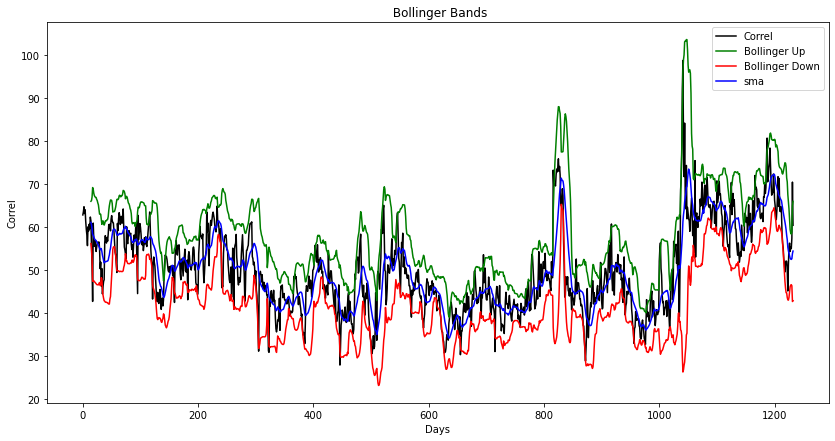

In [17]:
import matplotlib.pyplot as plt

df.head()

fig = plt.figure(figsize=(14,7))
plt.title(' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Correl')
plt.plot(df['implied_correl'], label='Correl', c = 'black')
plt.plot(df['bollinger_up'], label='Bollinger Up', c='g')
plt.plot(df['bollinger_down'], label='Bollinger Down', c='r')
plt.plot(df['sma'], label='sma', c='b')

plt.legend()
plt.show()

In [18]:
df.to_csv(output_path+"\series.csv")

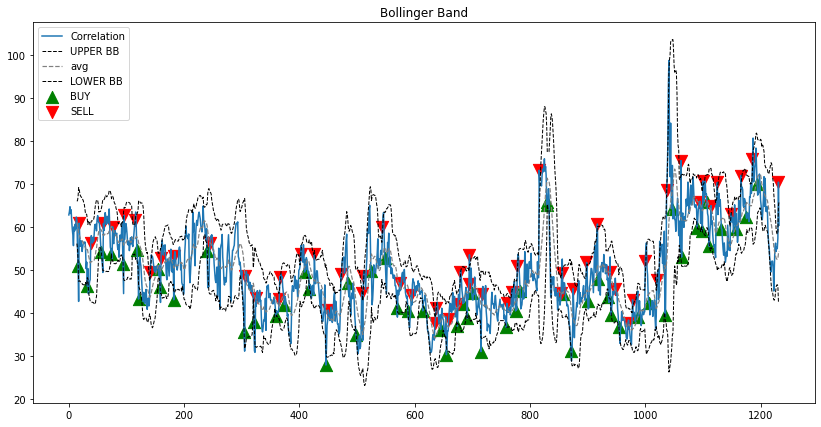

In [19]:
def implement_bb_strategy(data, lower_bb, upper_bb, avg):
    entry_ratio = []
    exit_ratio = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if(i==0):
            if data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            elif data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(0)
        else:
            if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] > avg[i-1] and data[i] < avg[i]:
                if signal != 0:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])                
            
            elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] < avg[i-1] and data[i] > avg[i]:
                if signal != 0:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(bb_signal[i-1])

    return entry_ratio, exit_ratio, bb_signal

df['entry_ratio'], df['exit_ratio'], df['bb_signal'] = implement_bb_strategy(df['implied_correl'], df['bollinger_down'], df['bollinger_up'], df['avg'])

fig = plt.figure(figsize=(14,7))


df['implied_correl'].plot(label = 'Correlation', alpha = 1)
df['bollinger_up'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['avg'].plot(label = 'avg', linestyle = '--', linewidth = 1.2, color = 'grey')
df['bollinger_down'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, df['entry_ratio'], marker = '^', color = 'green', label = 'BUY', s = 150)
plt.scatter(df.index, df['exit_ratio'], marker = 'v', color = 'red', label = 'SELL', s = 150)
plt.title('Bollinger Band')
plt.legend(loc = 'upper left')
plt.show()


In [20]:
df1 = df.copy()

In [21]:
df1['dispersion_entry'] = False #(df1['bb_signal'] == -1) & (df1['exit_ratio'] > 0)  & (df1['entry_ratio'].isna() == True)
df1['dispersion_exit'] = False #(df1['bb_signal'] == 0) & (df1['entry_ratio'] > 0) & (df1['entry_ratio'].isna() == False)

df1['correlation_entry'] = np.nan
df1['correlation_exit'] = np.nan
df1['bb_signal'] = np.nan

#df1['correlation_entry'] = (df1['bb_signal'] == 1) & (df1['entry_ratio'] > 0)  & (df1['exit_ratio'].isna() == True)
#df1['correlation_exit'] = (df1['bb_signal'] == 0)  & (df1['exit_ratio'] > 0)  & (df1['exit_ratio'].isna() == False):

df1['bb_signal'] = df1.apply(lambda x: 0 if x['BANKNIFTY_Date_CE']==x['BANKNIFTY_curr_exp_date_CE'] else 1, axis=1)



for i in range(len(df1)):
    if(i==0):
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
    elif (df1.loc[i-1, 'BANKNIFTY_Date_CE'] == df1.loc[i-1, 'BANKNIFTY_curr_exp_date_CE']):  
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
    elif (df1.loc[i,'BANKNIFTY_Date_CE'] == df1.loc[i,'BANKNIFTY_curr_exp_date_CE']):
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = True
    else:
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = False

    

In [22]:
df2 = df1.copy()


df2.to_csv(output_path + '//' + 'with entry exit signals_all data.csv')

In [23]:
# getting all the rows with entry or exit signals
df = df2[ (df2["dispersion_entry"] == True) | (df2["correlation_exit"] == True) | 
              (df2["dispersion_exit"] == True) | (df2["correlation_entry"] == True) ].reset_index()

df.to_csv(output_path + '//' + 'with entry exit signals.csv')

In [24]:
trades = []

for i in df.index[:-1]:
    if df["bb_signal"][i] == -1:
        strikes = {}
        strikes[index + '_Strike_CE'] = df[index + "_Strike_CE"][i]
        if delta != 50: 
            strikes[index + '_Strike_PE'] = df[index + "_Strike_PE"][i]
        else:
            strikes[index + '_Strike_PE'] = df[index + "_Strike_CE"][i]
            
        for j in stock_list:
            strikes[j + '_Strike_CE'] = df[j +"_Strike_CE"][i]
            if delta != 50: 
                strikes[j + '_Strike_PE'] = df[j + "_Strike_PE"][i]
            else:
                strikes[j + '_Strike_PE'] = df[j + "_Strike_CE"][i]
        trades.append( 
                        { 
                          "entry_date": df[index + "_Date_CE"][i],
                          "exit_date" : df[index + "_Date_CE"][i+1],
                          "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                          "type_of_trade": "SILS",
                          "strike" : strikes,
                          "entry_ratio" : df["exit_ratio"][i],
                          "exit_ratio" : df["entry_ratio"][i+1]
                        }
                      )
                            
    if df["bb_signal"][i] == 1:
            strikes = {}
            strikes[index + '_Strike_CE'] = df[index + "_Strike_CE"][i]
            if delta != 50:
                strikes[index + '_Strike_PE'] = df[index + "_Strike_PE"][i]
            else:
                strikes[index + '_Strike_PE'] = df[index + "_Strike_CE"][i]
            for j in stock_list:
                strikes[j + '_Strike_CE'] = df[j + "_Strike_CE"][i]
                if delta != 50: 
                    strikes[j + '_Strike_PE'] = df[j + "_Strike_PE"][i]
                else:
                    strikes[j + '_Strike_PE'] = df[j + "_Strike_CE"][i]
            trades.append( 
                            { 
                              "entry_date": df[index + "_Date_CE"][i],
                              "exit_date" : df[index + "_Date_CE"][i+1],
                              "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                              "type_of_trade": "LISS",
                              "strike" : strikes,
                              "entry_ratio" : df["entry_ratio"][i],
                              "exit_ratio" : df["exit_ratio"][i+1]
                            }
                          )

In [25]:
for i in tqdm(trades):
    date1 = i["entry_date"]
    date2 = i["exit_date"]
    expiry = i["expiry_date"]
    print(date1)
    print(date2)
    
    if expiry == date1:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        nextdf = pd.read_csv(index_file_path.replace(index,index+"-II"),parse_dates = ["Date"])
        
        df = df[(df["Date"] > date1) & (df["Date"] <= date2) &
                (((df["Strike"] == i["strike"][index + '_Strike_CE']) & (df["Option_Type"] == 'CE')) |
                 ((df["Strike"] == i["strike"][index + '_Strike_PE']) & (df["Option_Type"] == 'PE')))]
        nextdf = nextdf[(nextdf["Date"] == expiry) & 
                        (((nextdf["Strike"] == i["strike"][index + '_Strike_CE']) & (nextdf['Option_Type'] == 'CE')) |
                        ((nextdf['Strike'] == i['strike'][index + '_Strike_PE']) & (nextdf['Option_Type'] == 'PE')))]
        
        nextdf = nextdf.append(df)
        nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = nextdf
        for j in stock_list:
            path = stfolder + '/' + j + ".csv"
            df = pd.read_csv(path,parse_dates = ["Date"])
            nextdf = pd.read_csv(path.replace(j,j+"-II"),parse_dates = ["Date"])
                        
            df = df[(df["Date"] > date1) & (df["Date"] <= date2) &
                (((df["Strike"] == i["strike"][j + '_Strike_CE']) & (df["Option_Type"] == 'CE')) |
                 ((df["Strike"] == i["strike"][j + '_Strike_PE']) & (df["Option_Type"] == 'PE')))]   
            
            
            nextdf = nextdf[(nextdf["Date"] == expiry) & 
                        (((nextdf["Strike"] == i["strike"][index + '_Strike_CE']) & (nextdf['Option_Type'] == 'CE')) |
                        ((nextdf['Strike'] == i['strike'][index + '_Strike_PE']) & (nextdf['Option_Type'] == 'PE')))]
            nextdf = nextdf.append(df)
            nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
            df_dict[j] = nextdf
        i["dataframes"] = df_dict
    
    else:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        df = df[(df["Date"] >= date1) & (df["Date"] <= date2) &
                (((df["Strike"] == i["strike"][index + '_Strike_CE']) & (df["Option_Type"] == 'CE')) |
                 ((df["Strike"] == i["strike"][index + '_Strike_PE']) & (df["Option_Type"] == 'PE')))]
        df = pd.merge(df, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = df
        
        for j in stock_list:
            df = pd.read_csv(stfolder + '/' + j + ".csv",parse_dates = ["Date"])    
            df = df[(df["Date"] >= date1) & (df["Date"] <= date2) &
                (((df["Strike"] == i["strike"][j + '_Strike_CE']) & (df["Option_Type"] == 'CE')) |
                 ((df["Strike"] == i["strike"][j + '_Strike_PE']) & (df["Option_Type"] == 'PE')))]
                
            df = pd.merge(df, exp_df, on = 'Date', how = 'left')
            df_dict[j] = df
        i["dataframes"] = df_dict

  0%|          | 0/60 [00:00<?, ?it/s]

2016-01-01 00:00:00
2016-01-28 00:00:00
2016-01-29 00:00:00
2016-02-25 00:00:00
2016-02-26 00:00:00
2016-03-31 00:00:00
2016-04-01 00:00:00
2016-04-28 00:00:00
2016-04-29 00:00:00
2016-05-26 00:00:00
2016-05-27 00:00:00
2016-06-30 00:00:00
2016-07-01 00:00:00
2016-07-28 00:00:00
2016-07-29 00:00:00
2016-08-25 00:00:00
2016-08-26 00:00:00
2016-09-29 00:00:00
2016-09-30 00:00:00
2016-10-27 00:00:00
2016-10-28 00:00:00
2016-11-24 00:00:00
2016-11-25 00:00:00
2016-12-29 00:00:00
2016-12-30 00:00:00
2017-01-25 00:00:00
2017-01-27 00:00:00
2017-02-23 00:00:00
2017-02-27 00:00:00
2017-03-30 00:00:00
2017-03-31 00:00:00
2017-04-27 00:00:00
2017-04-28 00:00:00
2017-05-25 00:00:00
2017-05-26 00:00:00
2017-06-29 00:00:00
2017-06-30 00:00:00
2017-07-27 00:00:00
2017-07-28 00:00:00
2017-08-31 00:00:00
2017-09-01 00:00:00
2017-09-28 00:00:00
2017-09-29 00:00:00
2017-10-26 00:00:00
2017-10-27 00:00:00
2017-11-30 00:00:00
2017-12-01 00:00:00
2017-12-28 00:00:00
2017-12-29 00:00:00
2018-01-25 00:00:00


In [26]:
# check what does trades[i]['dataframes'] contains
for i in trades:
    print(i["dataframes"]['BANKNIFTY'].columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Date', 'Ticker', 'OPT_Open', 'OPT_High', 'OPT_Low', 'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike', 'Option_Type', 'IV', 'Delta', 'Theta', 'Gamma', 'Vega', 'EQ_Open', 'EQ_High', 'EQ_Low', 'EQ_Close', 'Ticker_Type', 'At The Money', 'Delta_15_Diff', 'Delta_15_Diff_Min', 'Delta_15_Strike', 'Delta_20_Diff', 'Delta_20_Diff_Min', 'Delta_20_Strike', 'Delta_25_Diff', 'Delta_25_Diff_Min', 'Delta_25_Strike', 'Delta_30_Diff', 'Delta_30_Diff_Min', 'Delta_30_Strike',
       'Delta_35_Diff', 'Delta_35_Diff_Min', 'Delta_35_Strike', 'Delta_40_Diff', 'Delta_40_Diff_Min', 'Delta_40_Strike', 'Delta_45_Diff', 'Delta_45_Diff_Min', 'Delta_45_Strike', 'Delta_50_Strike', 'curr_exp_date'],
      dtype='object')
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Date', 'Ticker', 'OPT_Open', 'OPT_High', 'OPT_Low', 'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike', 'Option_Type', 'IV', 'Delta', 'Theta', 'Gamma', 'Vega', 'EQ_Open', 'EQ_High', 'EQ_Low', 'EQ_Close', 'Ticker_Type', 'At The M

In [27]:
result = pd.DataFrame()
for trade_dict in trades:
    
    # df_dict contains options details for all the stocks and index for all the dates between entry and exit date
    df_dict = trade_dict["dataframes"]
    entry = trade_dict["entry_date"]
    exit = trade_dict["exit_date"]
    
    idx = df_dict[index][["Date","Ticker","OPT_Close","Strike","Option_Type","IV", 'Delta',"EQ_Close","curr_exp_date"]]
    
    idx_ce = idx[(idx["Option_Type"] == "CE")].add_suffix("_CE")
    idx_pe = idx[(idx["Option_Type"] == "PE")].add_suffix("_PE")
    
    
    
    final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    final = final.add_prefix(index +"_")

    for i in df_dict:
        if i == index:
            continue
        df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV", 'Delta', "EQ_Close","curr_exp_date"]]
        df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
        df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")

        temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
        temp = temp.T.drop_duplicates().T
        temp = temp.add_prefix(i +"_")
        
        final = final.merge(temp,left_on=index + '_Date_CE' , right_on= i + '_Date_CE', how = 'left')
    final["Trade_Type"] = trade_dict["type_of_trade"]
    
    final.to_csv(output_path + '//' + 'final.csv', index=False)

    conditions = [
    (final[index + '_Date_CE'] == entry),
    (final[index + '_Date_CE'] == exit),
    (final[index + '_Date_CE'] != exit) & (final[index + '_Date_CE'] != entry)]

    # create a list of the values we want to assign for each condition
    values = ['F', 'L', 'M']

    # create a new column and use np.select to assign values to it using our lists as arguments
    final['D_marker'] = np.select(conditions, values)
    result = result.append(final)
        
result = result.T.drop_duplicates().T
result.to_csv(output_path + '//' + 'final1.csv', index=False)
display(result)

<ipython-input-27-09752c5c3a6f>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-27-09752c5c3a6f>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-27-09752c5c3a6f>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-27-09752c5c3a6f>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-27-09752c5c3a6f>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(fi

<ipython-input-27-09752c5c3a6f>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-27-09752c5c3a6f>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-27-09752c5c3a6f>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-27-09752c5c3a6f>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-27-09752c5c3a6f>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(fi

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_Delta_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,BANKNIFTY_Delta_PE,AXISBANK_Ticker_CE,AXISBANK_OPT_Close_CE,AXISBANK_Strike_CE,AXISBANK_IV_CE,AXISBANK_Delta_CE,AXISBANK_EQ_Close_CE,AXISBANK_Ticker_PE,AXISBANK_OPT_Close_PE,AXISBANK_IV_PE,AXISBANK_Delta_PE,BANDHANBNK_Date_CE,BANDHANBNK_Ticker_CE,BANDHANBNK_OPT_Close_CE,BANDHANBNK_Strike_CE,BANDHANBNK_IV_CE,BANDHANBNK_Delta_CE,BANDHANBNK_EQ_Close_CE,BANDHANBNK_curr_exp_date_CE,BANDHANBNK_Date_PE,BANDHANBNK_Ticker_PE,BANDHANBNK_OPT_Close_PE,BANDHANBNK_IV_PE,BANDHANBNK_Delta_PE,BANKBARODA_Ticker_CE,BANKBARODA_OPT_Close_CE,BANKBARODA_Strike_CE,BANKBARODA_IV_CE,BANKBARODA_Delta_CE,BANKBARODA_EQ_Close_CE,BANKBARODA_Ticker_PE,BANKBARODA_OPT_Close_PE,BANKBARODA_IV_PE,BANKBARODA_Delta_PE,BANKINDIA_Date_CE,BANKINDIA_Ticker_CE,BANKINDIA_OPT_Close_CE,BANKINDIA_Strike_CE,BANKINDIA_IV_CE,BANKINDIA_Delta_CE,BANKINDIA_EQ_Close_CE,BANKINDIA_curr_exp_date_CE,BANKINDIA_Ticker_PE,BANKINDIA_OPT_Close_PE,BANKINDIA_IV_PE,BANKINDIA_Delta_PE,CANBK_Date_CE,CANBK_Ticker_CE,CANBK_OPT_Close_CE,CANBK_Strike_CE,CANBK_IV_CE,CANBK_Delta_CE,CANBK_EQ_Close_CE,CANBK_curr_exp_date_CE,CANBK_Ticker_PE,CANBK_OPT_Close_PE,CANBK_IV_PE,CANBK_Delta_PE,FEDERALBNK_Ticker_CE,FEDERALBNK_OPT_Close_CE,FEDERALBNK_Strike_CE,FEDERALBNK_IV_CE,FEDERALBNK_Delta_CE,FEDERALBNK_EQ_Close_CE,FEDERALBNK_Ticker_PE,FEDERALBNK_OPT_Close_PE,FEDERALBNK_IV_PE,FEDERALBNK_Delta_PE,HDFCBANK_Ticker_CE,HDFCBANK_OPT_Close_CE,HDFCBANK_Strike_CE,HDFCBANK_IV_CE,HDFCBANK_Delta_CE,HDFCBANK_EQ_Close_CE,HDFCBANK_Ticker_PE,HDFCBANK_OPT_Close_PE,HDFCBANK_IV_PE,HDFCBANK_Delta_PE,ICICIBANK_Date_CE,ICICIBANK_Ticker_CE,ICICIBANK_OPT_Close_CE,ICICIBANK_Strike_CE,ICICIBANK_IV_CE,ICICIBANK_Delta_CE,ICICIBANK_EQ_Close_CE,ICICIBANK_curr_exp_date_CE,ICICIBANK_Ticker_PE,ICICIBANK_OPT_Close_PE,ICICIBANK_IV_PE,ICICIBANK_Delta_PE,IDFCFIRSTB_Date_CE,IDFCFIRSTB_Ticker_CE,IDFCFIRSTB_OPT_Close_CE,IDFCFIRSTB_Strike_CE,IDFCFIRSTB_IV_CE,IDFCFIRSTB_Delta_CE,IDFCFIRSTB_EQ_Close_CE,IDFCFIRSTB_curr_exp_date_CE,IDFCFIRSTB_Ticker_PE,IDFCFIRSTB_OPT_Close_PE,IDFCFIRSTB_IV_PE,IDFCFIRSTB_Delta_PE,INDUSINDBK_Ticker_CE,INDUSINDBK_OPT_Close_CE,INDUSINDBK_Strike_CE,INDUSINDBK_IV_CE,INDUSINDBK_Delta_CE,INDUSINDBK_EQ_Close_CE,INDUSINDBK_Ticker_PE,INDUSINDBK_OPT_Close_PE,INDUSINDBK_IV_PE,INDUSINDBK_Delta_PE,KOTAKBANK_Ticker_CE,KOTAKBANK_OPT_Close_CE,KOTAKBANK_Strike_CE,KOTAKBANK_IV_CE,KOTAKBANK_Delta_CE,KOTAKBANK_EQ_Close_CE,KOTAKBANK_Ticker_PE,KOTAKBANK_OPT_Close_PE,KOTAKBANK_IV_PE,KOTAKBANK_Delta_PE,PNB_Ticker_CE,PNB_OPT_Close_CE,PNB_Strike_CE,PNB_IV_CE,PNB_Delta_CE,PNB_EQ_Close_CE,PNB_Ticker_PE,PNB_OPT_Close_PE,PNB_IV_PE,PNB_Delta_PE,RBLBANK_Date_CE,RBLBANK_Ticker_CE,RBLBANK_OPT_Close_CE,RBLBANK_Strike_CE,RBLBANK_IV_CE,RBLBANK_Delta_CE,RBLBANK_EQ_Close_CE,RBLBANK_curr_exp_date_CE,RBLBANK_Ticker_PE,RBLBANK_OPT_Close_PE,RBLBANK_IV_PE,RBLBANK_Delta_PE,SBIN_Ticker_CE,SBIN_OPT_Close_CE,SBIN_Strike_CE,SBIN_IV_CE,SBIN_Delta_CE,SBIN_EQ_Close_CE,SBIN_Ticker_PE,SBIN_OPT_Close_PE,SBIN_IV_PE,SBIN_Delta_PE,YESBANK_Date_CE,YESBANK_Ticker_CE,YESBANK_OPT_Close_CE,YESBANK_Strike_CE,YESBANK_IV_CE,YESBANK_Delta_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE,YESBANK_Delta_PE,Trade_Type,D_marker
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.173,0.5568,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5,0.173,-0.4421,AXISBANK450CE - I,14.7,450.0,0.2858,0.5327,449.9,AXISBANK450PE - I,12.1,0.2643,-0.4659,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,BANKBARODA160CE - I,5.8,160.0,0.3465,0.5087,159.05,BANKBARODA160PE - I,6.1,0.3431,-0.4905,2016-01-01,BANKINDIA117.5CE - I,4.2,117.5,0.3194,0.5278,117.35,2016-01-28,BANKINDIA117.5PE - I,3.05,0.2511,-0.4717,2016-01-01,CANBK240CE - I,7.9,240.0,0.3209,0.5013,238.3,2016-01-28,CANBK240PE - I,9.8,0.363,-0.4935,FEDERALBNK57.5CE - I,1.7,57.5,0.301

In [28]:
data = result.copy()

In [29]:
display(data)
data.to_csv(output_path + '//' + 'before_weigt_add_second_time.csv')

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_Delta_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,BANKNIFTY_Delta_PE,AXISBANK_Ticker_CE,AXISBANK_OPT_Close_CE,AXISBANK_Strike_CE,AXISBANK_IV_CE,AXISBANK_Delta_CE,AXISBANK_EQ_Close_CE,AXISBANK_Ticker_PE,AXISBANK_OPT_Close_PE,AXISBANK_IV_PE,AXISBANK_Delta_PE,BANDHANBNK_Date_CE,BANDHANBNK_Ticker_CE,BANDHANBNK_OPT_Close_CE,BANDHANBNK_Strike_CE,BANDHANBNK_IV_CE,BANDHANBNK_Delta_CE,BANDHANBNK_EQ_Close_CE,BANDHANBNK_curr_exp_date_CE,BANDHANBNK_Date_PE,BANDHANBNK_Ticker_PE,BANDHANBNK_OPT_Close_PE,BANDHANBNK_IV_PE,BANDHANBNK_Delta_PE,BANKBARODA_Ticker_CE,BANKBARODA_OPT_Close_CE,BANKBARODA_Strike_CE,BANKBARODA_IV_CE,BANKBARODA_Delta_CE,BANKBARODA_EQ_Close_CE,BANKBARODA_Ticker_PE,BANKBARODA_OPT_Close_PE,BANKBARODA_IV_PE,BANKBARODA_Delta_PE,BANKINDIA_Date_CE,BANKINDIA_Ticker_CE,BANKINDIA_OPT_Close_CE,BANKINDIA_Strike_CE,BANKINDIA_IV_CE,BANKINDIA_Delta_CE,BANKINDIA_EQ_Close_CE,BANKINDIA_curr_exp_date_CE,BANKINDIA_Ticker_PE,BANKINDIA_OPT_Close_PE,BANKINDIA_IV_PE,BANKINDIA_Delta_PE,CANBK_Date_CE,CANBK_Ticker_CE,CANBK_OPT_Close_CE,CANBK_Strike_CE,CANBK_IV_CE,CANBK_Delta_CE,CANBK_EQ_Close_CE,CANBK_curr_exp_date_CE,CANBK_Ticker_PE,CANBK_OPT_Close_PE,CANBK_IV_PE,CANBK_Delta_PE,FEDERALBNK_Ticker_CE,FEDERALBNK_OPT_Close_CE,FEDERALBNK_Strike_CE,FEDERALBNK_IV_CE,FEDERALBNK_Delta_CE,FEDERALBNK_EQ_Close_CE,FEDERALBNK_Ticker_PE,FEDERALBNK_OPT_Close_PE,FEDERALBNK_IV_PE,FEDERALBNK_Delta_PE,HDFCBANK_Ticker_CE,HDFCBANK_OPT_Close_CE,HDFCBANK_Strike_CE,HDFCBANK_IV_CE,HDFCBANK_Delta_CE,HDFCBANK_EQ_Close_CE,HDFCBANK_Ticker_PE,HDFCBANK_OPT_Close_PE,HDFCBANK_IV_PE,HDFCBANK_Delta_PE,ICICIBANK_Date_CE,ICICIBANK_Ticker_CE,ICICIBANK_OPT_Close_CE,ICICIBANK_Strike_CE,ICICIBANK_IV_CE,ICICIBANK_Delta_CE,ICICIBANK_EQ_Close_CE,ICICIBANK_curr_exp_date_CE,ICICIBANK_Ticker_PE,ICICIBANK_OPT_Close_PE,ICICIBANK_IV_PE,ICICIBANK_Delta_PE,IDFCFIRSTB_Date_CE,IDFCFIRSTB_Ticker_CE,IDFCFIRSTB_OPT_Close_CE,IDFCFIRSTB_Strike_CE,IDFCFIRSTB_IV_CE,IDFCFIRSTB_Delta_CE,IDFCFIRSTB_EQ_Close_CE,IDFCFIRSTB_curr_exp_date_CE,IDFCFIRSTB_Ticker_PE,IDFCFIRSTB_OPT_Close_PE,IDFCFIRSTB_IV_PE,IDFCFIRSTB_Delta_PE,INDUSINDBK_Ticker_CE,INDUSINDBK_OPT_Close_CE,INDUSINDBK_Strike_CE,INDUSINDBK_IV_CE,INDUSINDBK_Delta_CE,INDUSINDBK_EQ_Close_CE,INDUSINDBK_Ticker_PE,INDUSINDBK_OPT_Close_PE,INDUSINDBK_IV_PE,INDUSINDBK_Delta_PE,KOTAKBANK_Ticker_CE,KOTAKBANK_OPT_Close_CE,KOTAKBANK_Strike_CE,KOTAKBANK_IV_CE,KOTAKBANK_Delta_CE,KOTAKBANK_EQ_Close_CE,KOTAKBANK_Ticker_PE,KOTAKBANK_OPT_Close_PE,KOTAKBANK_IV_PE,KOTAKBANK_Delta_PE,PNB_Ticker_CE,PNB_OPT_Close_CE,PNB_Strike_CE,PNB_IV_CE,PNB_Delta_CE,PNB_EQ_Close_CE,PNB_Ticker_PE,PNB_OPT_Close_PE,PNB_IV_PE,PNB_Delta_PE,RBLBANK_Date_CE,RBLBANK_Ticker_CE,RBLBANK_OPT_Close_CE,RBLBANK_Strike_CE,RBLBANK_IV_CE,RBLBANK_Delta_CE,RBLBANK_EQ_Close_CE,RBLBANK_curr_exp_date_CE,RBLBANK_Ticker_PE,RBLBANK_OPT_Close_PE,RBLBANK_IV_PE,RBLBANK_Delta_PE,SBIN_Ticker_CE,SBIN_OPT_Close_CE,SBIN_Strike_CE,SBIN_IV_CE,SBIN_Delta_CE,SBIN_EQ_Close_CE,SBIN_Ticker_PE,SBIN_OPT_Close_PE,SBIN_IV_PE,SBIN_Delta_PE,YESBANK_Date_CE,YESBANK_Ticker_CE,YESBANK_OPT_Close_CE,YESBANK_Strike_CE,YESBANK_IV_CE,YESBANK_Delta_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE,YESBANK_Delta_PE,Trade_Type,D_marker
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.173,0.5568,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5,0.173,-0.4421,AXISBANK450CE - I,14.7,450.0,0.2858,0.5327,449.9,AXISBANK450PE - I,12.1,0.2643,-0.4659,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,BANKBARODA160CE - I,5.8,160.0,0.3465,0.5087,159.05,BANKBARODA160PE - I,6.1,0.3431,-0.4905,2016-01-01,BANKINDIA117.5CE - I,4.2,117.5,0.3194,0.5278,117.35,2016-01-28,BANKINDIA117.5PE - I,3.05,0.2511,-0.4717,2016-01-01,CANBK240CE - I,7.9,240.0,0.3209,0.5013,238.3,2016-01-28,CANBK240PE - I,9.8,0.363,-0.4935,FEDERALBNK57.5CE - I,1.7,57.5,0.301

### Adding Weight and Lot Columns Again

In [30]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Equal_Weightage","date","Lotsize"])

In [31]:


grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
data[index + "_Lotsize"] = index_lotsize
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
    d1[i + "_Lotsize"] = d1["Lotsize"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight",i+ "_Lotsize"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)


data.to_csv(output_path + '//' + 'weigt_add_second_time.csv')

<ipython-input-31-9f5ae1714298>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
<ipython-input-31-9f5ae1714298>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_Lotsize"] = d1["Lotsize"]
<ipython-input-31-9f5ae1714298>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

<ipython-input-31-9f5ae1714298>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Equal_Weightage"]
<ipython-input-31-9f5ae1714298>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_Lotsize"] = d1["Lotsize"]
<ipython-input-31-9f5ae1714298>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

32441
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


### Adding Final Weight Columns

In [32]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [33]:
filter_col = [col for col in data if col.endswith('Final_Weight')]
filter_col.remove(index + "_Final_Weight")

data[filter_col] = data[filter_col].replace(0,np.nan)
data["Min_Share_Value"] = data[filter_col].min(axis = 1)
data["Min_Share_Name"] = data[filter_col].idxmin(axis=1)
print(data["Min_Share_Value"])
print(data["Min_Share_Name"])

data[filter_col] = data[filter_col].replace(np.nan,0)

0       0.083333
1       0.083333
2       0.083333
3       0.083333
4       0.083333
          ...   
1228    0.083333
1229    0.083333
1230    0.083333
1231    0.083333
1232    0.083333
Name: Min_Share_Value, Length: 1233, dtype: float64
0       AXISBANK_Final_Weight
1       AXISBANK_Final_Weight
2       AXISBANK_Final_Weight
3       AXISBANK_Final_Weight
4       AXISBANK_Final_Weight
                ...          
1228    AXISBANK_Final_Weight
1229    AXISBANK_Final_Weight
1230    AXISBANK_Final_Weight
1231    AXISBANK_Final_Weight
1232    AXISBANK_Final_Weight
Name: Min_Share_Name, Length: 1233, dtype: object


In [34]:
display(data)
data.to_csv(output_path + '//' + 'before_qty_add.csv')

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_Delta_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,BANKNIFTY_Delta_PE,AXISBANK_Ticker_CE,AXISBANK_OPT_Close_CE,AXISBANK_Strike_CE,AXISBANK_IV_CE,AXISBANK_Delta_CE,AXISBANK_EQ_Close_CE,AXISBANK_Ticker_PE,AXISBANK_OPT_Close_PE,AXISBANK_IV_PE,AXISBANK_Delta_PE,BANDHANBNK_Date_CE,BANDHANBNK_Ticker_CE,BANDHANBNK_OPT_Close_CE,BANDHANBNK_Strike_CE,BANDHANBNK_IV_CE,BANDHANBNK_Delta_CE,BANDHANBNK_EQ_Close_CE,BANDHANBNK_curr_exp_date_CE,BANDHANBNK_Date_PE,BANDHANBNK_Ticker_PE,BANDHANBNK_OPT_Close_PE,BANDHANBNK_IV_PE,BANDHANBNK_Delta_PE,BANKBARODA_Ticker_CE,BANKBARODA_OPT_Close_CE,BANKBARODA_Strike_CE,BANKBARODA_IV_CE,BANKBARODA_Delta_CE,BANKBARODA_EQ_Close_CE,BANKBARODA_Ticker_PE,BANKBARODA_OPT_Close_PE,BANKBARODA_IV_PE,BANKBARODA_Delta_PE,BANKINDIA_Date_CE,BANKINDIA_Ticker_CE,BANKINDIA_OPT_Close_CE,BANKINDIA_Strike_CE,BANKINDIA_IV_CE,BANKINDIA_Delta_CE,BANKINDIA_EQ_Close_CE,BANKINDIA_curr_exp_date_CE,BANKINDIA_Ticker_PE,BANKINDIA_OPT_Close_PE,BANKINDIA_IV_PE,BANKINDIA_Delta_PE,CANBK_Date_CE,CANBK_Ticker_CE,CANBK_OPT_Close_CE,CANBK_Strike_CE,CANBK_IV_CE,CANBK_Delta_CE,CANBK_EQ_Close_CE,CANBK_curr_exp_date_CE,CANBK_Ticker_PE,CANBK_OPT_Close_PE,CANBK_IV_PE,CANBK_Delta_PE,FEDERALBNK_Ticker_CE,FEDERALBNK_OPT_Close_CE,FEDERALBNK_Strike_CE,FEDERALBNK_IV_CE,FEDERALBNK_Delta_CE,FEDERALBNK_EQ_Close_CE,FEDERALBNK_Ticker_PE,FEDERALBNK_OPT_Close_PE,FEDERALBNK_IV_PE,FEDERALBNK_Delta_PE,HDFCBANK_Ticker_CE,HDFCBANK_OPT_Close_CE,HDFCBANK_Strike_CE,HDFCBANK_IV_CE,HDFCBANK_Delta_CE,HDFCBANK_EQ_Close_CE,HDFCBANK_Ticker_PE,HDFCBANK_OPT_Close_PE,HDFCBANK_IV_PE,HDFCBANK_Delta_PE,ICICIBANK_Date_CE,ICICIBANK_Ticker_CE,ICICIBANK_OPT_Close_CE,ICICIBANK_Strike_CE,ICICIBANK_IV_CE,ICICIBANK_Delta_CE,ICICIBANK_EQ_Close_CE,ICICIBANK_curr_exp_date_CE,ICICIBANK_Ticker_PE,ICICIBANK_OPT_Close_PE,ICICIBANK_IV_PE,ICICIBANK_Delta_PE,IDFCFIRSTB_Date_CE,IDFCFIRSTB_Ticker_CE,IDFCFIRSTB_OPT_Close_CE,IDFCFIRSTB_Strike_CE,IDFCFIRSTB_IV_CE,IDFCFIRSTB_Delta_CE,IDFCFIRSTB_EQ_Close_CE,IDFCFIRSTB_curr_exp_date_CE,IDFCFIRSTB_Ticker_PE,IDFCFIRSTB_OPT_Close_PE,IDFCFIRSTB_IV_PE,IDFCFIRSTB_Delta_PE,INDUSINDBK_Ticker_CE,INDUSINDBK_OPT_Close_CE,INDUSINDBK_Strike_CE,INDUSINDBK_IV_CE,INDUSINDBK_Delta_CE,INDUSINDBK_EQ_Close_CE,INDUSINDBK_Ticker_PE,INDUSINDBK_OPT_Close_PE,INDUSINDBK_IV_PE,INDUSINDBK_Delta_PE,KOTAKBANK_Ticker_CE,KOTAKBANK_OPT_Close_CE,KOTAKBANK_Strike_CE,KOTAKBANK_IV_CE,KOTAKBANK_Delta_CE,KOTAKBANK_EQ_Close_CE,KOTAKBANK_Ticker_PE,KOTAKBANK_OPT_Close_PE,KOTAKBANK_IV_PE,KOTAKBANK_Delta_PE,PNB_Ticker_CE,PNB_OPT_Close_CE,PNB_Strike_CE,PNB_IV_CE,PNB_Delta_CE,PNB_EQ_Close_CE,PNB_Ticker_PE,PNB_OPT_Close_PE,PNB_IV_PE,PNB_Delta_PE,RBLBANK_Date_CE,RBLBANK_Ticker_CE,RBLBANK_OPT_Close_CE,RBLBANK_Strike_CE,RBLBANK_IV_CE,RBLBANK_Delta_CE,RBLBANK_EQ_Close_CE,RBLBANK_curr_exp_date_CE,RBLBANK_Ticker_PE,RBLBANK_OPT_Close_PE,RBLBANK_IV_PE,RBLBANK_Delta_PE,SBIN_Ticker_CE,SBIN_OPT_Close_CE,SBIN_Strike_CE,SBIN_IV_CE,SBIN_Delta_CE,SBIN_EQ_Close_CE,SBIN_Ticker_PE,SBIN_OPT_Close_PE,SBIN_IV_PE,SBIN_Delta_PE,YESBANK_Date_CE,YESBANK_Ticker_CE,YESBANK_OPT_Close_CE,YESBANK_Strike_CE,YESBANK_IV_CE,YESBANK_Delta_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE,YESBANK_Delta_PE,Trade_Type,D_marker,BANKNIFTY_OG_Weight,BANKNIFTY_Lotsize,AXISBANK_OG_Weight,AXISBANK_Lotsize,BANDHANBNK_OG_Weight,BANDHANBNK_Lotsize,BANKBARODA_OG_Weight,BANKBARODA_Lotsize,BANKINDIA_OG_Weight,BANKINDIA_Lotsize,CANBK_OG_Weight,CANBK_Lotsize,FEDERALBNK_OG_Weight,FEDERALBNK_Lotsize,HDFCBANK_OG_Weight,HDFCBANK_Lotsize,ICICIBANK_OG_Weight,ICICIBANK_Lotsize,IDFCFIRSTB_OG_Weight,IDFCFIRSTB_Lotsize,INDUSINDBK_OG_Weight,INDUSINDBK_Lotsize,KOTAKBANK_OG_Weight,KOTAKBANK_Lotsize,PNB_OG_Weight,PNB_Lotsize,RBLBANK_OG_Weight,RBLBANK_Lotsize,SBIN_OG_Weight,SBIN_Lotsize,YESBANK_OG_Weight,YESBANK_Lotsize,actual_wgt_sum,AXISBANK_Fina

In [35]:
#ADDING QTYS
result = data.copy()
min_exp = []
for idi, row in result.iterrows():
    min_share_stock = row['Min_Share_Name'].replace("_Final_Weight","")
    #print(min_share_stock)
    value  = row[min_share_stock + "_EQ_Close_CE"]*row[min_share_stock + "_Lotsize"]
    min_exp.append(value)
    
result["MinExp"] = min_exp
result[index + "_exp"] = (result["MinExp"]/result["Min_Share_Value"])
#result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"])).astype(int)
result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"]))
result[index + "_qty"] = result[index + "_lot"]*result[index + "_Lotsize"]

result.to_csv(output_path + '//' + 'resultt.csv')

#for stocks with includeok=0, making '_Lotsize' & '_EQ_Close_CE' non-zero

filter_col_Lotsize = [col for col in result if col.endswith('_Lotsize')]
filter_col_Lotsize.remove(index + "_Lotsize")
result[filter_col_Lotsize] = result[filter_col_Lotsize].replace(0,1)


filter_col_EQ_Close = [col for col in result if col.endswith('_EQ_Close_CE')]
filter_col_EQ_Close.remove(index + "_EQ_Close_CE")
result[filter_col_EQ_Close] = result[filter_col_EQ_Close].replace(0,1)

result['index_exp'] = result[index + "_exp"]

result.to_csv(output_path + '//' + 'resulttcheckcheck.csv')

result['stock_exp'] = 0

for i in stock_list:
    print(i)
    if(i==min_share_stock):
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = result["MinExp"]
        result[i  + "_lot"] = 1
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        
    else:
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = (result[index + "_exp"]*result[i + "_Final_Weight"])
#         result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"])).astype(int)
        result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"]))
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        

AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK


In [36]:
result['total_exposure'] = (result['index_exp'] + result['stock_exp']) * 2

conditions = [
    (result["Trade_Type"] == "LISS"),
    (result["Trade_Type"] == "SILS")]

values = [result['total_exposure']/10,result['total_exposure']/10]
result['margin'] = np.select(conditions, values)

result['units'] = (initial_equity/result['margin'])

result.to_csv(output_path+"/final2.csv")

In [37]:
conditions = [
    (result["D_marker"] == "F"),
    (result["D_marker"] != "F")]

values = [result[index + "_qty"]*result['units'],np.nan]
result[index + '_qty_final'] = np.select(conditions, values)

for i in stock_list:
    values = [result[i + "_qty"]*result['units'],np.nan]
    result[i + '_qty_final'] = np.select(conditions, values)

In [38]:
result = result.ffill()

In [39]:
display(result)

result.to_csv(output_path + "/final3.csv")

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_Delta_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,BANKNIFTY_Delta_PE,AXISBANK_Ticker_CE,AXISBANK_OPT_Close_CE,AXISBANK_Strike_CE,AXISBANK_IV_CE,AXISBANK_Delta_CE,AXISBANK_EQ_Close_CE,AXISBANK_Ticker_PE,AXISBANK_OPT_Close_PE,AXISBANK_IV_PE,AXISBANK_Delta_PE,BANDHANBNK_Date_CE,BANDHANBNK_Ticker_CE,BANDHANBNK_OPT_Close_CE,BANDHANBNK_Strike_CE,BANDHANBNK_IV_CE,BANDHANBNK_Delta_CE,BANDHANBNK_EQ_Close_CE,BANDHANBNK_curr_exp_date_CE,BANDHANBNK_Date_PE,BANDHANBNK_Ticker_PE,BANDHANBNK_OPT_Close_PE,BANDHANBNK_IV_PE,BANDHANBNK_Delta_PE,BANKBARODA_Ticker_CE,BANKBARODA_OPT_Close_CE,BANKBARODA_Strike_CE,BANKBARODA_IV_CE,BANKBARODA_Delta_CE,BANKBARODA_EQ_Close_CE,BANKBARODA_Ticker_PE,BANKBARODA_OPT_Close_PE,BANKBARODA_IV_PE,BANKBARODA_Delta_PE,BANKINDIA_Date_CE,BANKINDIA_Ticker_CE,BANKINDIA_OPT_Close_CE,BANKINDIA_Strike_CE,BANKINDIA_IV_CE,BANKINDIA_Delta_CE,BANKINDIA_EQ_Close_CE,BANKINDIA_curr_exp_date_CE,BANKINDIA_Ticker_PE,BANKINDIA_OPT_Close_PE,BANKINDIA_IV_PE,BANKINDIA_Delta_PE,CANBK_Date_CE,CANBK_Ticker_CE,CANBK_OPT_Close_CE,CANBK_Strike_CE,CANBK_IV_CE,CANBK_Delta_CE,CANBK_EQ_Close_CE,CANBK_curr_exp_date_CE,CANBK_Ticker_PE,CANBK_OPT_Close_PE,CANBK_IV_PE,CANBK_Delta_PE,FEDERALBNK_Ticker_CE,FEDERALBNK_OPT_Close_CE,FEDERALBNK_Strike_CE,FEDERALBNK_IV_CE,FEDERALBNK_Delta_CE,FEDERALBNK_EQ_Close_CE,FEDERALBNK_Ticker_PE,FEDERALBNK_OPT_Close_PE,FEDERALBNK_IV_PE,FEDERALBNK_Delta_PE,HDFCBANK_Ticker_CE,HDFCBANK_OPT_Close_CE,HDFCBANK_Strike_CE,HDFCBANK_IV_CE,HDFCBANK_Delta_CE,HDFCBANK_EQ_Close_CE,HDFCBANK_Ticker_PE,HDFCBANK_OPT_Close_PE,HDFCBANK_IV_PE,HDFCBANK_Delta_PE,ICICIBANK_Date_CE,ICICIBANK_Ticker_CE,ICICIBANK_OPT_Close_CE,ICICIBANK_Strike_CE,ICICIBANK_IV_CE,ICICIBANK_Delta_CE,ICICIBANK_EQ_Close_CE,ICICIBANK_curr_exp_date_CE,ICICIBANK_Ticker_PE,ICICIBANK_OPT_Close_PE,ICICIBANK_IV_PE,ICICIBANK_Delta_PE,IDFCFIRSTB_Date_CE,IDFCFIRSTB_Ticker_CE,IDFCFIRSTB_OPT_Close_CE,IDFCFIRSTB_Strike_CE,IDFCFIRSTB_IV_CE,IDFCFIRSTB_Delta_CE,IDFCFIRSTB_EQ_Close_CE,IDFCFIRSTB_curr_exp_date_CE,IDFCFIRSTB_Ticker_PE,IDFCFIRSTB_OPT_Close_PE,IDFCFIRSTB_IV_PE,IDFCFIRSTB_Delta_PE,INDUSINDBK_Ticker_CE,INDUSINDBK_OPT_Close_CE,INDUSINDBK_Strike_CE,INDUSINDBK_IV_CE,INDUSINDBK_Delta_CE,INDUSINDBK_EQ_Close_CE,INDUSINDBK_Ticker_PE,INDUSINDBK_OPT_Close_PE,INDUSINDBK_IV_PE,INDUSINDBK_Delta_PE,KOTAKBANK_Ticker_CE,KOTAKBANK_OPT_Close_CE,KOTAKBANK_Strike_CE,KOTAKBANK_IV_CE,KOTAKBANK_Delta_CE,KOTAKBANK_EQ_Close_CE,KOTAKBANK_Ticker_PE,KOTAKBANK_OPT_Close_PE,KOTAKBANK_IV_PE,KOTAKBANK_Delta_PE,PNB_Ticker_CE,PNB_OPT_Close_CE,PNB_Strike_CE,PNB_IV_CE,PNB_Delta_CE,PNB_EQ_Close_CE,PNB_Ticker_PE,PNB_OPT_Close_PE,PNB_IV_PE,PNB_Delta_PE,RBLBANK_Date_CE,RBLBANK_Ticker_CE,RBLBANK_OPT_Close_CE,RBLBANK_Strike_CE,RBLBANK_IV_CE,RBLBANK_Delta_CE,RBLBANK_EQ_Close_CE,RBLBANK_curr_exp_date_CE,RBLBANK_Ticker_PE,RBLBANK_OPT_Close_PE,RBLBANK_IV_PE,RBLBANK_Delta_PE,SBIN_Ticker_CE,SBIN_OPT_Close_CE,SBIN_Strike_CE,SBIN_IV_CE,SBIN_Delta_CE,SBIN_EQ_Close_CE,SBIN_Ticker_PE,SBIN_OPT_Close_PE,SBIN_IV_PE,SBIN_Delta_PE,YESBANK_Date_CE,YESBANK_Ticker_CE,YESBANK_OPT_Close_CE,YESBANK_Strike_CE,YESBANK_IV_CE,YESBANK_Delta_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE,YESBANK_Delta_PE,Trade_Type,D_marker,BANKNIFTY_OG_Weight,BANKNIFTY_Lotsize,AXISBANK_OG_Weight,AXISBANK_Lotsize,BANDHANBNK_OG_Weight,BANDHANBNK_Lotsize,BANKBARODA_OG_Weight,BANKBARODA_Lotsize,BANKINDIA_OG_Weight,BANKINDIA_Lotsize,CANBK_OG_Weight,CANBK_Lotsize,FEDERALBNK_OG_Weight,FEDERALBNK_Lotsize,HDFCBANK_OG_Weight,HDFCBANK_Lotsize,ICICIBANK_OG_Weight,ICICIBANK_Lotsize,IDFCFIRSTB_OG_Weight,IDFCFIRSTB_Lotsize,INDUSINDBK_OG_Weight,INDUSINDBK_Lotsize,KOTAKBANK_OG_Weight,KOTAKBANK_Lotsize,PNB_OG_Weight,PNB_Lotsize,RBLBANK_OG_Weight,RBLBANK_Lotsize,SBIN_OG_Weight,SBIN_Lotsize,YESBANK_OG_Weight,YESBANK_Lotsize,actual_wgt_sum,AXISBANK_Fina

In [40]:
display(curr_final_df)
display(next_final_df)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_Delta_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,BANKNIFTY_Delta_PE,AXISBANK_Ticker_CE,AXISBANK_OPT_Close_CE,AXISBANK_Strike_CE,AXISBANK_IV_CE,AXISBANK_Delta_CE,AXISBANK_EQ_Close_CE,AXISBANK_Ticker_PE,AXISBANK_OPT_Close_PE,AXISBANK_IV_PE,AXISBANK_Delta_PE,BANDHANBNK_Date_CE,BANDHANBNK_Ticker_CE,BANDHANBNK_OPT_Close_CE,BANDHANBNK_Strike_CE,BANDHANBNK_IV_CE,BANDHANBNK_Delta_CE,BANDHANBNK_EQ_Close_CE,BANDHANBNK_curr_exp_date_CE,BANDHANBNK_Ticker_PE,BANDHANBNK_OPT_Close_PE,BANDHANBNK_IV_PE,BANDHANBNK_Delta_PE,BANKBARODA_Ticker_CE,BANKBARODA_OPT_Close_CE,BANKBARODA_Strike_CE,BANKBARODA_IV_CE,BANKBARODA_Delta_CE,BANKBARODA_EQ_Close_CE,BANKBARODA_Ticker_PE,BANKBARODA_OPT_Close_PE,BANKBARODA_IV_PE,BANKBARODA_Delta_PE,BANKINDIA_Date_CE,BANKINDIA_Ticker_CE,BANKINDIA_OPT_Close_CE,BANKINDIA_Strike_CE,BANKINDIA_IV_CE,BANKINDIA_Delta_CE,BANKINDIA_EQ_Close_CE,BANKINDIA_curr_exp_date_CE,BANKINDIA_Ticker_PE,BANKINDIA_OPT_Close_PE,BANKINDIA_IV_PE,BANKINDIA_Delta_PE,CANBK_Ticker_CE,CANBK_OPT_Close_CE,CANBK_Strike_CE,CANBK_IV_CE,CANBK_Delta_CE,CANBK_EQ_Close_CE,CANBK_Ticker_PE,CANBK_OPT_Close_PE,CANBK_IV_PE,CANBK_Delta_PE,FEDERALBNK_Ticker_CE,FEDERALBNK_OPT_Close_CE,FEDERALBNK_Strike_CE,FEDERALBNK_IV_CE,FEDERALBNK_Delta_CE,FEDERALBNK_EQ_Close_CE,FEDERALBNK_Ticker_PE,FEDERALBNK_OPT_Close_PE,FEDERALBNK_IV_PE,FEDERALBNK_Delta_PE,HDFCBANK_Ticker_CE,HDFCBANK_OPT_Close_CE,HDFCBANK_Strike_CE,HDFCBANK_IV_CE,HDFCBANK_Delta_CE,HDFCBANK_EQ_Close_CE,HDFCBANK_Ticker_PE,HDFCBANK_OPT_Close_PE,HDFCBANK_IV_PE,HDFCBANK_Delta_PE,ICICIBANK_Ticker_CE,ICICIBANK_OPT_Close_CE,ICICIBANK_Strike_CE,ICICIBANK_IV_CE,ICICIBANK_Delta_CE,ICICIBANK_EQ_Close_CE,ICICIBANK_Ticker_PE,ICICIBANK_OPT_Close_PE,ICICIBANK_IV_PE,ICICIBANK_Delta_PE,IDFCFIRSTB_Date_CE,IDFCFIRSTB_Ticker_CE,IDFCFIRSTB_OPT_Close_CE,IDFCFIRSTB_Strike_CE,IDFCFIRSTB_IV_CE,IDFCFIRSTB_Delta_CE,IDFCFIRSTB_EQ_Close_CE,IDFCFIRSTB_curr_exp_date_CE,IDFCFIRSTB_Ticker_PE,IDFCFIRSTB_OPT_Close_PE,IDFCFIRSTB_IV_PE,IDFCFIRSTB_Delta_PE,INDUSINDBK_Ticker_CE,INDUSINDBK_OPT_Close_CE,INDUSINDBK_Strike_CE,INDUSINDBK_IV_CE,INDUSINDBK_Delta_CE,INDUSINDBK_EQ_Close_CE,INDUSINDBK_Ticker_PE,INDUSINDBK_OPT_Close_PE,INDUSINDBK_IV_PE,INDUSINDBK_Delta_PE,KOTAKBANK_Ticker_CE,KOTAKBANK_OPT_Close_CE,KOTAKBANK_Strike_CE,KOTAKBANK_IV_CE,KOTAKBANK_Delta_CE,KOTAKBANK_EQ_Close_CE,KOTAKBANK_Ticker_PE,KOTAKBANK_OPT_Close_PE,KOTAKBANK_IV_PE,KOTAKBANK_Delta_PE,PNB_Ticker_CE,PNB_OPT_Close_CE,PNB_Strike_CE,PNB_IV_CE,PNB_Delta_CE,PNB_EQ_Close_CE,PNB_Ticker_PE,PNB_OPT_Close_PE,PNB_IV_PE,PNB_Delta_PE,RBLBANK_Date_CE,RBLBANK_Ticker_CE,RBLBANK_OPT_Close_CE,RBLBANK_Strike_CE,RBLBANK_IV_CE,RBLBANK_Delta_CE,RBLBANK_EQ_Close_CE,RBLBANK_curr_exp_date_CE,RBLBANK_Ticker_PE,RBLBANK_OPT_Close_PE,RBLBANK_IV_PE,RBLBANK_Delta_PE,SBIN_Ticker_CE,SBIN_OPT_Close_CE,SBIN_Strike_CE,SBIN_IV_CE,SBIN_Delta_CE,SBIN_EQ_Close_CE,SBIN_Ticker_PE,SBIN_OPT_Close_PE,SBIN_IV_PE,SBIN_Delta_PE,YESBANK_Date_CE,YESBANK_Ticker_CE,YESBANK_OPT_Close_CE,YESBANK_Strike_CE,YESBANK_IV_CE,YESBANK_Delta_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE,YESBANK_Delta_PE,BANKNIFTY_Avg IV,BANKNIFTY_Avg Delta,AXISBANK_Avg IV,AXISBANK_Avg Delta,BANDHANBNK_Avg IV,BANDHANBNK_Avg Delta,BANKBARODA_Avg IV,BANKBARODA_Avg Delta,BANKINDIA_Avg IV,BANKINDIA_Avg Delta,CANBK_Avg IV,CANBK_Avg Delta,FEDERALBNK_Avg IV,FEDERALBNK_Avg Delta,HDFCBANK_Avg IV,HDFCBANK_Avg Delta,ICICIBANK_Avg IV,ICICIBANK_Avg Delta,IDFCFIRSTB_Avg IV,IDFCFIRSTB_Avg Delta,INDUSINDBK_Avg IV,INDUSINDBK_Avg Delta,KOTAKBANK_Avg IV,KOTAKBANK_Avg Delta,PNB_Avg IV,PNB_Avg Delta,RBLBANK_Avg IV,RBLBANK_Avg Delta,SBIN_Avg IV,SBIN_Avg Delta,YESBANK_Avg IV,YESBANK_Avg Delta
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,0.5568,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,0.1730,-0.4421,AXISBANK450CE - I,14.70,450.0,0.285

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_Delta_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,BANKNIFTY_Delta_PE,AXISBANK_Ticker_CE,AXISBANK_OPT_Close_CE,AXISBANK_Strike_CE,AXISBANK_IV_CE,AXISBANK_Delta_CE,AXISBANK_EQ_Close_CE,AXISBANK_Ticker_PE,AXISBANK_OPT_Close_PE,AXISBANK_IV_PE,AXISBANK_Delta_PE,BANDHANBNK_Date_CE,BANDHANBNK_Ticker_CE,BANDHANBNK_OPT_Close_CE,BANDHANBNK_Strike_CE,BANDHANBNK_IV_CE,BANDHANBNK_Delta_CE,BANDHANBNK_EQ_Close_CE,BANDHANBNK_curr_exp_date_CE,BANDHANBNK_Ticker_PE,BANDHANBNK_OPT_Close_PE,BANDHANBNK_IV_PE,BANDHANBNK_Delta_PE,BANKBARODA_Ticker_CE,BANKBARODA_OPT_Close_CE,BANKBARODA_Strike_CE,BANKBARODA_IV_CE,BANKBARODA_Delta_CE,BANKBARODA_EQ_Close_CE,BANKBARODA_Ticker_PE,BANKBARODA_OPT_Close_PE,BANKBARODA_IV_PE,BANKBARODA_Delta_PE,BANKINDIA_Date_CE,BANKINDIA_Ticker_CE,BANKINDIA_OPT_Close_CE,BANKINDIA_Strike_CE,BANKINDIA_IV_CE,BANKINDIA_Delta_CE,BANKINDIA_EQ_Close_CE,BANKINDIA_curr_exp_date_CE,BANKINDIA_Ticker_PE,BANKINDIA_OPT_Close_PE,BANKINDIA_IV_PE,BANKINDIA_Delta_PE,CANBK_Ticker_CE,CANBK_OPT_Close_CE,CANBK_Strike_CE,CANBK_IV_CE,CANBK_Delta_CE,CANBK_EQ_Close_CE,CANBK_Ticker_PE,CANBK_OPT_Close_PE,CANBK_IV_PE,CANBK_Delta_PE,FEDERALBNK_Ticker_CE,FEDERALBNK_OPT_Close_CE,FEDERALBNK_Strike_CE,FEDERALBNK_IV_CE,FEDERALBNK_Delta_CE,FEDERALBNK_EQ_Close_CE,FEDERALBNK_Ticker_PE,FEDERALBNK_OPT_Close_PE,FEDERALBNK_IV_PE,FEDERALBNK_Delta_PE,HDFCBANK_Ticker_CE,HDFCBANK_OPT_Close_CE,HDFCBANK_Strike_CE,HDFCBANK_IV_CE,HDFCBANK_Delta_CE,HDFCBANK_EQ_Close_CE,HDFCBANK_Ticker_PE,HDFCBANK_OPT_Close_PE,HDFCBANK_IV_PE,HDFCBANK_Delta_PE,ICICIBANK_Ticker_CE,ICICIBANK_OPT_Close_CE,ICICIBANK_Strike_CE,ICICIBANK_IV_CE,ICICIBANK_Delta_CE,ICICIBANK_EQ_Close_CE,ICICIBANK_Ticker_PE,ICICIBANK_OPT_Close_PE,ICICIBANK_IV_PE,ICICIBANK_Delta_PE,IDFCFIRSTB_Date_CE,IDFCFIRSTB_Ticker_CE,IDFCFIRSTB_OPT_Close_CE,IDFCFIRSTB_Strike_CE,IDFCFIRSTB_IV_CE,IDFCFIRSTB_Delta_CE,IDFCFIRSTB_EQ_Close_CE,IDFCFIRSTB_curr_exp_date_CE,IDFCFIRSTB_Ticker_PE,IDFCFIRSTB_OPT_Close_PE,IDFCFIRSTB_IV_PE,IDFCFIRSTB_Delta_PE,INDUSINDBK_Ticker_CE,INDUSINDBK_OPT_Close_CE,INDUSINDBK_Strike_CE,INDUSINDBK_IV_CE,INDUSINDBK_Delta_CE,INDUSINDBK_EQ_Close_CE,INDUSINDBK_Ticker_PE,INDUSINDBK_OPT_Close_PE,INDUSINDBK_IV_PE,INDUSINDBK_Delta_PE,KOTAKBANK_Ticker_CE,KOTAKBANK_OPT_Close_CE,KOTAKBANK_Strike_CE,KOTAKBANK_IV_CE,KOTAKBANK_Delta_CE,KOTAKBANK_EQ_Close_CE,KOTAKBANK_Ticker_PE,KOTAKBANK_OPT_Close_PE,KOTAKBANK_IV_PE,KOTAKBANK_Delta_PE,PNB_Ticker_CE,PNB_OPT_Close_CE,PNB_Strike_CE,PNB_IV_CE,PNB_Delta_CE,PNB_EQ_Close_CE,PNB_Ticker_PE,PNB_OPT_Close_PE,PNB_IV_PE,PNB_Delta_PE,RBLBANK_Date_CE,RBLBANK_Ticker_CE,RBLBANK_OPT_Close_CE,RBLBANK_Strike_CE,RBLBANK_IV_CE,RBLBANK_Delta_CE,RBLBANK_EQ_Close_CE,RBLBANK_curr_exp_date_CE,RBLBANK_Ticker_PE,RBLBANK_OPT_Close_PE,RBLBANK_IV_PE,RBLBANK_Delta_PE,SBIN_Ticker_CE,SBIN_OPT_Close_CE,SBIN_Strike_CE,SBIN_IV_CE,SBIN_Delta_CE,SBIN_EQ_Close_CE,SBIN_Ticker_PE,SBIN_OPT_Close_PE,SBIN_IV_PE,SBIN_Delta_PE,YESBANK_Date_CE,YESBANK_Ticker_CE,YESBANK_OPT_Close_CE,YESBANK_Strike_CE,YESBANK_IV_CE,YESBANK_Delta_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE,YESBANK_Delta_PE
0,2016-01-01,BANKNIFTY17000CE - II,536.00,17000.0,0.1722,0.5685,17033.8008,2016-01-28,BANKNIFTY17000PE - II,367.15,0.1692,-0.4285,AXISBANK450CE - II,19.45,450.0,0.2566,0.5478,449.90,AXISBANK450PE - II,14.55,0.2330,-0.4488,NaT,0,0.00,0.0,0.0000,0.0000,0.00,NaT,0,0.00,0.0000,0.0000,BANKBARODA160CE - II,7.50,160.0,0.3005,0.5274,159.05,BANKBARODA160PE - II,6.65,0.2760,-0.4717,2016-01-01,BANKINDIA117.5CE - II,5.30,117.5,0.2727,0.5434,117.35,2016-01-28,BANKINDIA117.5PE - II,4.15,0.2494,-0.4540,CANBK240CE - II,10.20,240.0,0.2758,0.5218,238.30,CANBK240PE - II,9.20,0.2514,-0.4777,FEDERALBNK57.5CE - II,2.85,57.5,0.3304,0.5179,56.95,FEDERALBNK57.5PE - II,2.75,0.3056,-0.4822,HDFCBANK540CE - II,18.075,540.0,0.1612,0.6092,544.38,

# Adjustments Starts Here

In [41]:
result = pd.read_csv(output_path + "/final3.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)


result1 = pd.read_csv(output_path + "/final3.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

result1["Date"] = result1["BANKNIFTY_Date_CE"]

final = pd.DataFrame()
final[index + '_Date_CE'] = result1["Date"]
for i in stock_list:
    print(i)
    path  = stfolder+ '/' + i + ".csv"
    df1 = pd.read_csv(path,parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close",f'Delta_{delta}_Strike','EQ_Close'], dayfirst = True)

    df_ce = df1[(df1["Strike"] == df1[f'Delta_{delta}_Strike']) & (df1["Option_Type"] == "CE")].add_suffix("_CE").add_prefix("Current_")
    df_pe = df1[(df1["Strike"] == df1[f'Delta_{delta}_Strike']) & (df1["Option_Type"] == "PE")].add_suffix("_PE").add_prefix("Current_")
    
    temp = df_ce.merge(df_pe, left_on='Current_Date_CE', right_on='Current_Date_PE').drop(columns = ["Current_Option_Type_PE","Current_Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Current_Date_CE').drop(columns = [i + "_Current_Date_CE"])
final = final.T.drop_duplicates().T

result1 = result1.merge(final, how = "left", on = index+'_Date_CE')
result1.to_csv(output_path+"/final3.1.csv")
display(result1)


AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK


,Unnamed: 0,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_Delta_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,BANKNIFTY_Delta_PE,AXISBANK_Ticker_CE,AXISBANK_OPT_Close_CE,AXISBANK_Strike_CE,AXISBANK_IV_CE,AXISBANK_Delta_CE,AXISBANK_EQ_Close_CE,AXISBANK_Ticker_PE,AXISBANK_OPT_Close_PE,AXISBANK_IV_PE,AXISBANK_Delta_PE,BANDHANBNK_Date_CE,BANDHANBNK_Ticker_CE,BANDHANBNK_OPT_Close_CE,BANDHANBNK_Strike_CE,BANDHANBNK_IV_CE,BANDHANBNK_Delta_CE,BANDHANBNK_EQ_Close_CE,BANDHANBNK_curr_exp_date_CE,BANDHANBNK_Date_PE,BANDHANBNK_Ticker_PE,BANDHANBNK_OPT_Close_PE,BANDHANBNK_IV_PE,BANDHANBNK_Delta_PE,BANKBARODA_Ticker_CE,BANKBARODA_OPT_Close_CE,BANKBARODA_Strike_CE,BANKBARODA_IV_CE,BANKBARODA_Delta_CE,BANKBARODA_EQ_Close_CE,BANKBARODA_Ticker_PE,BANKBARODA_OPT_Close_PE,BANKBARODA_IV_PE,BANKBARODA_Delta_PE,BANKINDIA_Date_CE,BANKINDIA_Ticker_CE,BANKINDIA_OPT_Close_CE,BANKINDIA_Strike_CE,BANKINDIA_IV_CE,BANKINDIA_Delta_CE,BANKINDIA_EQ_Close_CE,BANKINDIA_curr_exp_date_CE,BANKINDIA_Ticker_PE,BANKINDIA_OPT_Close_PE,BANKINDIA_IV_PE,BANKINDIA_Delta_PE,CANBK_Date_CE,CANBK_Ticker_CE,CANBK_OPT_Close_CE,CANBK_Strike_CE,CANBK_IV_CE,CANBK_Delta_CE,CANBK_EQ_Close_CE,CANBK_curr_exp_date_CE,CANBK_Ticker_PE,CANBK_OPT_Close_PE,CANBK_IV_PE,CANBK_Delta_PE,FEDERALBNK_Ticker_CE,FEDERALBNK_OPT_Close_CE,FEDERALBNK_Strike_CE,FEDERALBNK_IV_CE,FEDERALBNK_Delta_CE,FEDERALBNK_EQ_Close_CE,FEDERALBNK_Ticker_PE,FEDERALBNK_OPT_Close_PE,FEDERALBNK_IV_PE,FEDERALBNK_Delta_PE,HDFCBANK_Ticker_CE,HDFCBANK_OPT_Close_CE,HDFCBANK_Strike_CE,HDFCBANK_IV_CE,HDFCBANK_Delta_CE,HDFCBANK_EQ_Close_CE,HDFCBANK_Ticker_PE,HDFCBANK_OPT_Close_PE,HDFCBANK_IV_PE,HDFCBANK_Delta_PE,ICICIBANK_Date_CE,ICICIBANK_Ticker_CE,ICICIBANK_OPT_Close_CE,ICICIBANK_Strike_CE,ICICIBANK_IV_CE,ICICIBANK_Delta_CE,ICICIBANK_EQ_Close_CE,ICICIBANK_curr_exp_date_CE,ICICIBANK_Ticker_PE,ICICIBANK_OPT_Close_PE,ICICIBANK_IV_PE,ICICIBANK_Delta_PE,IDFCFIRSTB_Date_CE,IDFCFIRSTB_Ticker_CE,IDFCFIRSTB_OPT_Close_CE,IDFCFIRSTB_Strike_CE,IDFCFIRSTB_IV_CE,IDFCFIRSTB_Delta_CE,IDFCFIRSTB_EQ_Close_CE,IDFCFIRSTB_curr_exp_date_CE,IDFCFIRSTB_Ticker_PE,IDFCFIRSTB_OPT_Close_PE,IDFCFIRSTB_IV_PE,IDFCFIRSTB_Delta_PE,INDUSINDBK_Ticker_CE,INDUSINDBK_OPT_Close_CE,INDUSINDBK_Strike_CE,INDUSINDBK_IV_CE,INDUSINDBK_Delta_CE,INDUSINDBK_EQ_Close_CE,INDUSINDBK_Ticker_PE,INDUSINDBK_OPT_Close_PE,INDUSINDBK_IV_PE,INDUSINDBK_Delta_PE,KOTAKBANK_Ticker_CE,KOTAKBANK_OPT_Close_CE,KOTAKBANK_Strike_CE,KOTAKBANK_IV_CE,KOTAKBANK_Delta_CE,KOTAKBANK_EQ_Close_CE,KOTAKBANK_Ticker_PE,KOTAKBANK_OPT_Close_PE,KOTAKBANK_IV_PE,KOTAKBANK_Delta_PE,PNB_Ticker_CE,PNB_OPT_Close_CE,PNB_Strike_CE,PNB_IV_CE,PNB_Delta_CE,PNB_EQ_Close_CE,PNB_Ticker_PE,PNB_OPT_Close_PE,PNB_IV_PE,PNB_Delta_PE,RBLBANK_Date_CE,RBLBANK_Ticker_CE,RBLBANK_OPT_Close_CE,RBLBANK_Strike_CE,RBLBANK_IV_CE,RBLBANK_Delta_CE,RBLBANK_EQ_Close_CE,RBLBANK_curr_exp_date_CE,RBLBANK_Ticker_PE,RBLBANK_OPT_Close_PE,RBLBANK_IV_PE,RBLBANK_Delta_PE,SBIN_Ticker_CE,SBIN_OPT_Close_CE,SBIN_Strike_CE,SBIN_IV_CE,SBIN_Delta_CE,SBIN_EQ_Close_CE,SBIN_Ticker_PE,SBIN_OPT_Close_PE,SBIN_IV_PE,SBIN_Delta_PE,YESBANK_Date_CE,YESBANK_Ticker_CE,YESBANK_OPT_Close_CE,YESBANK_Strike_CE,YESBANK_IV_CE,YESBANK_Delta_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE,YESBANK_Delta_PE,Trade_Type,D_marker,BANKNIFTY_OG_Weight,BANKNIFTY_Lotsize,AXISBANK_OG_Weight,AXISBANK_Lotsize,BANDHANBNK_OG_Weight,BANDHANBNK_Lotsize,BANKBARODA_OG_Weight,BANKBARODA_Lotsize,BANKINDIA_OG_Weight,BANKINDIA_Lotsize,CANBK_OG_Weight,CANBK_Lotsize,FEDERALBNK_OG_Weight,FEDERALBNK_Lotsize,HDFCBANK_OG_Weight,HDFCBANK_Lotsize,ICICIBANK_OG_Weight,ICICIBANK_Lotsize,IDFCFIRSTB_OG_Weight,IDFCFIRSTB_Lotsize,INDUSINDBK_OG_Weight,INDUSINDBK_Lotsize,KOTAKBANK_OG_Weight,KOTAKBANK_Lotsize,PNB_OG_Weight,PNB_Lotsize,RBLBANK_OG_Weight,RBLBANK_Lotsize,SBIN_OG_Weight,SBIN_Lotsize,YESBANK_OG_Weight,YESBANK_Lotsize,actual_wgt_sum,AX

# Trigger Adjustment

In [45]:
trigger = [100, 125, 150, 175, 200]
result = pd.read_csv(output_path + "/final3.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

import warnings
warnings.filterwarnings("ignore")

for t in trigger:
    print("trigger :", t)

    print("Generating trigger Signals.....")
    print("          ", datetime.datetime.now())
    result1 = pd.read_csv(output_path + "/final3.1.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

    for i in stock_list:
        if delta != 50: 
            result1[i + '_Current_Strike_PE'] = result1[i + "_Current_Strike_PE"]
        else:
            result1[i + '_Current_Strike_PE'] = result1[i + "_Current_Strike_CE"]

    
    for idi, row in result1.iterrows():
        if row["D_marker"] == "F":

            result1.loc[idi, index + 'total_premium'] = result1.loc[idi, index + '_OPT_Close_CE'] + result1.loc[idi, index + "_OPT_Close_PE"]

            for i in stock_list:
                result1.loc[idi, i + "D_marker_1"] = "F"
                result1.loc[idi+1:, i + 'D_marker_1'] = "M"
                result1.loc[idi, i + "D_marker_2"] = "F"
                result1.loc[idi+1:, i + "D_marker_2"] = "M"



                result1.loc[idi, i + 'total_premium'] = result1.loc[idi, i + '_Current_OPT_Close_CE'] + result1.loc[idi, i + "_Current_OPT_Close_PE"]
                result1.loc[idi, i + 'stop_trigger_CE'] = t*(result1.loc[idi, i + '_Current_Strike_CE'] + result1.loc[idi, i + 'total_premium'])/100
                result1.loc[idi, i + 'stop_trigger_PE'] = t*(result1.loc[idi, i + '_Current_Strike_PE'] - result1.loc[idi, i + 'total_premium'])/100
                result1.loc[idi+1:, i + 'stop_trigger_CE'] = np.nan
                result1.loc[idi+1:, i + 'stop_trigger_PE'] = np.nan

            result1 = result1.ffill()



        else:
            for i in stock_list:

                if result1.loc[idi, "D_marker"] == "L":
                    result1.loc[idi, i + "D_marker_1"] = "L"
                    result1.loc[idi, i + "D_marker_2"] = "L"

                else:

                    if result1.loc[idi, i + 'stop_trigger_CE'] <= result1.loc[idi, i + '_Current_EQ_Close_CE']:
                        result1.loc[idi, i + "D_marker_1"] = "L"
                        result1.loc[idi, i + "D_marker_2"] = "F"

                        result1.loc[idi, i + 'total_premium'] = result1.loc[idi, i + '_Current_OPT_Close_CE'] + result1.loc[idi, i + "_Current_OPT_Close_PE"]
                        result1.loc[idi, i + 'stop_trigger_CE'] = t*(result1.loc[idi, i + '_Current_Strike_CE'] + result1.loc[idi, i + 'total_premium'])/100
                        result1.loc[idi, i + 'stop_trigger_PE'] = t*(result1.loc[idi, i + '_Current_Strike_PE'] - result1.loc[idi, i + 'total_premium'])/100
                        result1.loc[idi+1:, i + 'stop_trigger_CE'] = np.nan
                        result1.loc[idi+1:, i + 'stop_trigger_PE'] = np.nan


                    if result1.loc[idi, i + 'stop_trigger_PE'] >= result1.loc[idi, i + '_Current_EQ_Close_CE']:
                        result1.loc[idi, i + "D_marker_1"] = "L"
                        result1.loc[idi, i + "D_marker_2"] = "F"

                        result1.loc[idi, i + 'total_premium'] = result1.loc[idi, i + '_Current_OPT_Close_CE'] + result1.loc[idi, i + "_Current_OPT_Close_PE"]
                        result1.loc[idi, i + 'stop_trigger_CE'] = t*(result1.loc[idi, i + '_Current_Strike_CE'] + result1.loc[idi, i + 'total_premium'])/100
                        result1.loc[idi, i + 'stop_trigger_PE'] = t*(result1.loc[idi, i + '_Current_Strike_PE'] - result1.loc[idi, i + 'total_premium'])/100
                        result1.loc[idi+1:, i + 'stop_trigger_CE'] = np.nan
                        result1.loc[idi+1:, i + 'stop_trigger_PE'] = np.nan

                    result1 = result1.ffill()


    #display(result1)      

    result1.to_csv(output_path + "/final3.2__" + str(t) + ".csv")


    #######################################################################################################################


    print("Generating TradeList.....")
    print("          ", datetime.datetime.now())

    trades = []
    for j in stock_list:
        df = result1[(result1[j + "D_marker_1"] == "F") | (result1[j + "D_marker_1"] == "L")].reset_index()
        #display(df)

        for i in df.index[:-1]:
            if df[j + "D_marker_2"][i] == "F":
                strikes_ce = {}
                strikes_ce[j] = df[j+"_Current_Strike_CE"][i]
                strikes_pe = {}
                strikes_pe[j] = df[j+"_Current_Strike_PE"][i]
                trades.append( 
                                { 
                                  "symbol" : j,
                                  j + "_entry_date": df[index + "_Date_CE"][i],
                                  j + "_exit_date" : df[index + "_Date_CE"][i+1],
                                  "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                                  "new_month_date" : df[index+"_curr_exp_date_CE"][i+1],
                                  "strike_ce" : strikes_ce,
                                  "strike_pe" : strikes_pe,  
                                  "marker_1" : df[j + "D_marker_1"][i],
                                  "marker_2" : df[j + "D_marker_2"][i],

                                }
                              )


    #######################################################################################################################


    df_dum = pd.DataFrame()

    df_dum['Date'] = result1['BANKNIFTY_Date_CE']

    for j in stock_list:
        print(j)
        path = direc + '/' + j + ".csv"
        for i in trades:
            symbol = i["symbol"]
            if j == symbol:
                #print("####################",j)
                date1 = i[j + "_entry_date"]
                date2 = i[j + "_exit_date"]
                expiry = i["expiry_date"]
                new_month_date = i["new_month_date"]
                marker_1 = i["marker_1"]
                marker_2 = i["marker_2"]
    #             print(date1)
    #             print(date2)
    #             print(i["strike_ce"][j])
    #             print(i["strike_pe"][j])

                if ((marker_1 == "F") & (marker_2 == "F")):       #new trade data from same row
                    df_dict = {}

                    df = pd.read_csv(path,parse_dates = ["Date"], dayfirst = True, usecols = ["Date","Ticker","Option_Type","Strike",
                                                                        "OPT_Close","EQ_Close","IV", 'Delta', f"Delta_{delta}_Strike"])

                    df_ce = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Option_Type"] == "CE") & (df["Strike"] == i["strike_ce"][j])].add_suffix("_CE")
                    df_pe = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Option_Type"] == "PE") & (df["Strike"] == i["strike_pe"][j])].add_suffix("_PE")
                    df = pd.merge(df_ce, df_pe, left_on = 'Date_CE',right_on = 'Date_PE', how = 'left').reset_index()
                    df['Date'] = df['Date_CE']
                    df = pd.merge(df_dum, df, on = 'Date', how = 'left').reset_index()
                    df_dict[j] = df
                    i["dataframes"] = df_dict

                elif (marker_1 == "L") & (marker_2 == "F"):     #new trade data from next row

                    df_dict = {}

                    df = pd.read_csv(path,parse_dates = ["Date"], dayfirst = True, usecols = ["Date","Ticker","Option_Type","Strike",
                                                                        "OPT_Close","EQ_Close","IV", 'Delta', f"Delta_{delta}_Strike"])

                    df_ce = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Option_Type"] == "CE") & (df["Strike"] == i["strike_ce"][j])].add_suffix("_CE")
                    df_pe = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Option_Type"] == "PE") & (df["Strike"] == i["strike_pe"][j])].add_suffix("_PE")
                    df = pd.merge(df_ce, df_pe, left_on = 'Date_CE',right_on = 'Date_PE', how = 'left').reset_index()
                    df['Date'] = df['Date_CE']
                    df = pd.merge(df_dum, df, on = 'Date', how = 'left').reset_index()

                    df_dict[j] = df
                    i["dataframes"] = df_dict



    #######################################################################################################################





    result1 = pd.DataFrame()
    result1[index + "_Date_CE"] = result[index + "_Date_CE"]

    for j in stock_list:
        print("j", j)
        final = pd.DataFrame()

        for trade_dict in trades:
            df_dict = trade_dict["dataframes"]
            for i in df_dict:
                    if (i != j):
                        continue

                    df_ce = df_dict[i][["Date_CE","Ticker_CE","OPT_Close_CE","Strike_CE","Option_Type_CE","IV_CE","EQ_Close_CE"]]
                    df_pe = df_dict[i][["Date_CE","Ticker_PE","OPT_Close_PE","Strike_PE","Option_Type_PE","IV_PE"]]
                    df_ce = df_ce.dropna()
                    df_pe = df_pe.dropna()

                    temp = pd.merge(df_ce,df_pe, on='Date_CE', how='left').drop(columns = ["Option_Type_PE","Option_Type_CE"])
                    temp = temp.T.drop_duplicates().T
                    temp['Date_CE'] = pd.to_datetime(temp['Date_CE'])
                    temp = temp.add_prefix(i +"_new_")
                    final = final.append(temp)

        result1 = result1.merge(final,left_on=index + '_Date_CE' , right_on= j + '_new_Date_CE', how = 'left')

    result1 = result1.T.drop_duplicates().T    
    result1.to_csv(output_path + "/final3.3__" + str(t) + ".csv")
    #display(result1)    



    #######################################################################################################################



    result1 = pd.read_csv(output_path + "/final3.2__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)
    result2 = pd.read_csv(output_path + "/final3.3__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)


    result = result1.merge(result2,how='left',on=index+'_Date_CE')

    #result.to_csv(output_path + "/final4.csv")
    #display(result)




    #######################################################################################################################
    print("Calculating PnL.....")
    print("          ", datetime.datetime.now())

    #result = pd.read_csv(output_path + "/final4.csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

    u = result.select_dtypes(exclude=['datetime'])
    result[u.columns] = u.fillna(0)


    plvalue = []
    pl = 0
    transaction_cost = 0

    for idi, row in result.iterrows():
        pval = 0
        if row["D_marker"] == "F":
                        
            
            result.loc[idi, 'pl_check'] = pl + initial_equity
            result.loc[idi+1:, 'pl_check'] = np.nan

            result.loc[idi , 'units_new'] = ((result.loc[idi ,'pl_check'])/result.loc[idi, 'margin'])
            result.loc[idi+1: , 'units_new'] = np.nan

            result.loc[idi, index + '_qty_final'] = result.loc[idi, index + "_qty"] * result.loc[idi, 'units_new']
            result.loc[idi+1:, index + '_qty_final'] = np.nan

            result.loc[idi, 'plvalue_' + index] = 0
            
            contract_value = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] + result.loc[idi, index + "_OPT_Close_PE"])
            
            
            for i in stock_list:                                                                    
                result.loc[idi, i + '_qty_final'] = result.loc[idi, i + "_qty"] * result.loc[idi, 'units_new']
                result.loc[idi+1:, i + '_qty_final'] = np.nan
                result.loc[idi, 'plvalue_' + i] = 0
                contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] + result.loc[idi, i + "_OPT_Close_PE"])

            result.loc[idi, 'transaction_cost'] = 0
            result = result.ffill()
        

        else:

                if row["Trade_Type"] == "SILS":
                    plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] - result.loc[idi, index + "_OPT_Close_CE"])
                    plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_PE"] - result.loc[idi, index + "_OPT_Close_PE"])
                    pval = plvalce + plvalpe

                    result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe

                    for i in stock_list:

                        if result.loc[idi-1,i+"D_marker_2"] == "F":

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] - result.loc[idi-1, i + "_Current_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_PE"] - result.loc[idi-1, i + "_Current_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

                        else:

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] - result.loc[idi-1, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_PE"] - result.loc[idi-1, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe
                            
                        if ((result.loc[idi, i+"D_marker_1"] == "L") & (result.loc[idi, i+"D_marker_2"] == "F")):
                            
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] + result.loc[idi, i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_Current_OPT_Close_CE"] + result.loc[idi, i + "_Current_OPT_Close_PE"])
                            
                if row["Trade_Type"] == "LISS":
                    plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] - result.loc[idi-1, index + "_OPT_Close_CE"])
                    plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_PE"] - result.loc[idi-1, index + "_OPT_Close_PE"])
                    pval = plvalce + plvalpe

                    result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe

                    for i in stock_list:
                        if result.loc[idi-1,i+"D_marker_2"] == "F":
                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Current_OPT_Close_CE"] - result.loc[idi, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Current_OPT_Close_PE"] - result.loc[idi, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

                        else:

                            plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_new_OPT_Close_CE"] - result.loc[idi, i + "_new_OPT_Close_CE"])
                            plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_new_OPT_Close_PE"] - result.loc[idi, i + "_new_OPT_Close_PE"])
                            pval += plvalce + plvalpe

                            result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 
                        
                        if ((result.loc[idi, i+"D_marker_1"] == "L") & (result.loc[idi, i+"D_marker_2"] == "F")):
                            
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_new_OPT_Close_CE"] + result.loc[idi, i + "_new_OPT_Close_PE"])
                            contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_Current_OPT_Close_CE"] + result.loc[idi, i + "_Current_OPT_Close_PE"])



                pl += pval

        
        if row['D_marker'] == "L":
            
            contract_value += result.loc[idi-1, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] + result.loc[idi-1, index + "_OPT_Close_PE"])
            
            for i in stock_list:                                                                    
                contract_value += result.loc[idi-1, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_CE"] + result.loc[idi-1, i + "_OPT_Close_PE"])
            
            transaction_cost = contract_value*0.005
            pl = pl - transaction_cost
            result.loc[idi, 'transaction_cost'] = transaction_cost
        
        plvalue.append(pval)

    result["Daily_PL"] = plvalue

    #result.to_csv(output_path+"\pl_final4.csv")


    result.loc[0,'Daily_PL'] = initial_equity
    result["PortfolioValue"] = (result["Daily_PL"] - result["transaction_cost"]).cumsum()
    result.loc[0,'Daily_PL'] = 0

    #display(result)
    result.to_csv(output_path+"/final4.1__" + str(t) + ".csv")
    
    #######################################################################################################################



    finallist = pd.DataFrame()
    tradelist = result[ (result["D_marker"] == "F") | (result["D_marker"] == "L") ]

    if list(tradelist.iloc[[-1]]["D_marker"])[0] == "F":
        tradelist.drop(tradelist.tail(1).index,inplace=True)
    else:
        tradelist = tradelist

    tr1 = tradelist[tradelist["D_marker"]=="F"].reset_index().drop(columns = ["index"])
    tr2 = tradelist[tradelist["D_marker"]=="L"].reset_index().drop(columns = ["index"])

    #print(tr1.shape[0])
    if tr1.shape[0] == tr2.shape[0]:
        for idx in tr1.index:
            mdict = {}
            mdict["Entry_Date"] = tr1[index+ "_Date_CE"][idx]
            mdict["Exit_Date"] = tr2[index+ "_Date_CE"][idx]
            mdict["Trade_Type"] = tr1["Trade_Type"][idx]
            for i in symbols:
                for j in ["CE","PE"]:
                    mdict[i + "_Entry_Price_" + j] = tr1[i + "_OPT_Close_" + j][idx] 
                    mdict[i + "_Exit_Price_" + j] = tr2[i + "_OPT_Close_" + j][idx]
                    mdict[i + "_Qty_" + j] = tr1[i + "_qty_final"][idx]
            temp = pd.DataFrame([mdict])
            #display(temp)
            finallist = finallist.append(temp)
    else:
        print("Error, Tradelist not proper")

    finallist.reset_index().drop(columns = ["index"])





    #######################################################################################################################




    #tradelist =  pd.concat([finallist, finallist_exp], axis=1)

    tradelist = finallist

    #display(tradelist)

    #tradelist.to_csv(output_path+"/trdlist.csv")

    pl_tradelist = tradelist.copy()
    plvalue = []
    pval = 0
    for idi, row in pl_tradelist.iterrows():

        if row["Trade_Type"] == "SILS":
            pvalce = row[index + "_Qty_CE"]*(row[index + "_Entry_Price_CE"] - row[index + "_Exit_Price_CE"])
            pvalpe = row[index + "_Qty_PE"]*(row[index + "_Entry_Price_PE"] - row[index + "_Exit_Price_PE"])
            pval = pvalce + pvalpe

            for i in stock_list:
                pvalce = row[i + "_Qty_CE"]*(row[i + "_Exit_Price_CE"] - row[i + "_Entry_Price_CE"])
                pvalpe = row[i + "_Qty_PE"]*(row[i + "_Exit_Price_PE"] - row[i + "_Entry_Price_PE"])
                pval += pvalce + pvalpe    

        if row["Trade_Type"] == "LISS":
            pvalce = row[index + "_Qty_CE"]*(row[index + "_Exit_Price_CE"] - row[index + "_Entry_Price_CE"])
            pvalpe = row[index + "_Qty_PE"]*(row[index + "_Exit_Price_PE"] - row[index + "_Entry_Price_PE"])
            pval = pvalce + pvalpe

            for i in stock_list:
                pvalce = row[i + "_Qty_CE"]*(row[i + "_Entry_Price_CE"] - row[i + "_Exit_Price_CE"])
                pvalpe = row[i + "_Qty_PE"]*(row[i + "_Entry_Price_PE"] - row[i + "_Exit_Price_PE"])
                pval += pvalce + pvalpe    

        plvalue.append(pval)

    pl_tradelist['pl'] = plvalue
    pl_tradelist.to_csv(output_path+"\pl_trdlist__" + str(t) + ".csv")



    #######################################################################################################################




    ### Calculate CAGR 
    result = pd.read_csv(output_path+"/final4.1__" + str(t) + ".csv", parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)
    df = result.copy()
    from pyxirr import xirr

    firstValue = int(df.loc[0, 'PortfolioValue'])
    lastValue = int(df.loc[df.index[-1], 'PortfolioValue'])

    firstDate = (df.loc[0, 'BANKNIFTY_Date_CE'])
    lastDate = (df.loc[df.index[-1], 'BANKNIFTY_Date_CE'])

    dates = [firstDate, lastDate]
    amounts = [-firstValue, lastValue]
    
    
    xirr = xirr(dates, amounts)

    print("xirr : ", xirr*100)
    ### Calculate Daily Drawdown

    Roll_Max = round(df['PortfolioValue'].expanding().max(), 2)
    Daily_Drawdown = (round(df['PortfolioValue'], 2)/Roll_Max) - 1.0



    df['Daily_Drawdown'] = Daily_Drawdown * 100

    print("max dd : ", min(df['Daily_Drawdown']))

    df.to_csv(output_path + '/DailyDrawdown.csv', index=False)

    ### Monthly PNL Percentage 

    df['BANKNIFTY_curr_exp_date_CE'] = pd.to_datetime(df['BANKNIFTY_curr_exp_date_CE'], dayfirst=True)

    df['Year'] = pd.DatetimeIndex(df['BANKNIFTY_curr_exp_date_CE']).year
    df['Month'] = pd.DatetimeIndex(df['BANKNIFTY_curr_exp_date_CE']).month
    df.to_csv(output_path + '/df.csv', index=False)

    i = 0
    dfg = df.groupby(['Year', 'Month'])
    for name, group in dfg:
        #print(name)
        if i == 0: 
            firstValue = group['PortfolioValue'].iloc[0]
            i = 1
        else:
            firstValue = lastValue

        lastValue = group['PortfolioValue'].loc[group.index[-1]]
        change = lastValue/firstValue - 1
        df.loc[group.index, 'Change_%_Monthly'] = round(change * 100, 2)

    i = 0
    dfg = df.groupby(['Year'])
    for name, group in dfg:
        #print(name)
        if i == 0: 
            firstValue = group['PortfolioValue'].iloc[0]
            i = 1
        else:
            firstValue = lastValue

        lastValue = group['PortfolioValue'].loc[group.index[-1]]
        change = lastValue/firstValue - 1
        df.loc[group.index, 'Change_%_Yearly'] = change * 100

    df

    df1 = df[['Year', 'Month', 'Change_%_Monthly', 'Change_%_Yearly']]
    df1 = df1.drop_duplicates()
    df1

    pivotTable = df1.pivot_table(values ='Change_%_Monthly', index =['Year', 'Change_%_Yearly'],
                             columns =['Month'])
    pivotTable.columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

    pivotTable.index

    def _color_red_or_green(val):
        color = '#EE0000' if val < 0 else '#00EE00'
        return 'background-color: %s' % color
    pivotTable.style.applymap(_color_red_or_green)








trigger : 100
Generating trigger Signals.....
           2022-06-05 20:11:22.630546
Generating TradeList.....
           2022-06-05 20:25:38.632587
AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK
j AXISBANK
j BANDHANBNK
j BANKBARODA
j BANKINDIA
j CANBK
j FEDERALBNK
j HDFCBANK
j ICICIBANK
j IDFCFIRSTB
j INDUSINDBK
j KOTAKBANK
j PNB
j RBLBANK
j SBIN
j YESBANK
Calculating PnL.....
           2022-06-06 08:49:55.647725
xirr :  57.017789411023145
max dd :  -30.255226404899418
trigger : 125
Generating trigger Signals.....
           2022-06-06 08:50:12.332733
Generating TradeList.....
           2022-06-06 09:03:57.472107
AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK
j AXISBANK
j BANDHANBNK
j BANKBARODA
j BANKINDIA
j CANBK
j FEDERALBNK
j HDFCBANK
j ICICIBANK
j IDFCFIRSTB
j INDUSINDBK
j KOTAKBANK
j PNB
j RBLBANK
j SBIN
j 

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.